# Kings County House Project

In [ ]:
# Description of the business problem
## Real estate for house sale
## Homeowners benefits of renovation on sale price
## Benefits to the real world

### Objective
My objective of the project is to answer the question which is “What will be the predicted value of home sale value in King County?”. 
    • The housing price changes frequently
           → What factors play into price changing?
    • Who would like to know?
           → Home buyers, sellers, renters, investors, and businesses.
### Data Source
The dataset has a good mix of categorical independent variables, and a continuous dependent variable (price). This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold from May 2014 to May 2015. It is a useful dataset for evaluating simple regression models.

## Business understanding
Home prices are continually changing. The reality of not knowing whether the price for a potential house is going to increase or not, makes it very challenging for future homeowners to plan, be prepared and ready, timely and financially. This factor plays into the role of influencing the assumption of how hard it is to buy a house since home seekers need to have a long checklist of what is required to buy a house. Being able to predict the fluctuation of home prices should not be one of the tasks in that checklist. In fact, not only future homeowners are ones who are interested; renters, investors, and businesses will all be benefited from the outcome of this project. Predicting house price is not an easy task. It is very challenging and requires the exploration of many factors to be able to come up with the findings. For this project, I’m using a single dataset (kc_data.csv). This dataset contains house sale prices for King County, which includes Seattle, between May 2014 and May 2015. My goal is to explore the correlation between home price and other in the dataset to come up with the final findings and
prediction. Additionally, I’m not taking into consideration any potential unique events in the real estate
world or any macroeconomics factors since it is out of scope and I don’t have the right resources for this
task.

In [1]:
# Warnings
# import warnings
# warnings.simplefilter(action = "ignore", category = FutureWarning)

# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
# import data and preview
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.shape

(21597, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataset contains 21 columns. Most columns do not contain missing values, however, columns waterfront(2376), view(63) and yr_renovated(3842) contain missing values. We are going to explore the specific columns, and look to take needed action to sort these columns. The date and sqft_basement columns have been converted as object, we may need to change that. Are there unique values in the id column? What is the relationship between longitudes, latitudes and zipcode? Bedrooms and Bathrooms columns appear to be categorical values.

## 2. EDA

In [ ]:
# process data first

In [3]:
# Make a copy of data for editing
data_anan = data.copy()
data_anan.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
data_anan.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Exploring some relationships
We create a heatmap and see the possible relationships betweent the column variables.

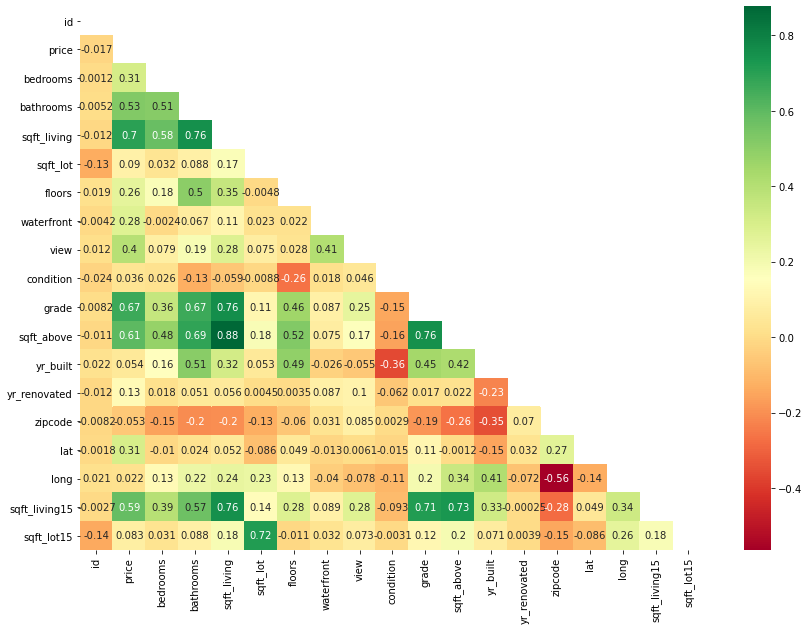

In [7]:
# data_anan heatmap corr
plt.subplots(figsize = (14, 10))
mask = np.triu(np.ones_like(data_anan.corr()))
sns.heatmap(data_anan.corr(), annot = True, cmap = "RdYlGn", mask = mask);

Using a threshold of 0.70 and -0.70 as indicators of strong correlation, we see that:
1. sqft_living has a strong positive correlation with price, bathrooms, grade, sqft_above and sqft_living15.
2. sqft_above also has a strong positive correlation with grade
3. sqft_living15 also has a strong positive correlation with grade and sqft_above
4. sqft_lot15 has a strong positive correlation with sqft_lot

Given that our target variable would be the price, we have observed multiple collinear relationships in our dataset which should be futher investigated.

In [4]:
# Picking these specific columns of interest
data_anan[["sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]].head(10)

,sqft_living,sqft_lot,sqft_above,sqft_basement
0,1180,5650,1180,0.0
1,2570,7242,2170,400.0
2,770,10000,770,0.0
3,1960,5000,1050,910.0
4,1680,8080,1680,0.0
5,5420,101930,3890,1530.0
6,1715,6819,1715,?
7,1060,9711,1060,0.0
8,1780,7470,1050,730.0
9,1890,6560,1890,0.0


From above we observe that their is a relationship between sqft_living, sqft_above and sqft_basement.

That is sqft_living = sqft_above + sqft_basement.

We also see that there is a unique object '?' in the sqft_basement column. We will change this column to numeric.

We will also look to remove sqft_living column as it can be obtained from the other two columns.

In [7]:
data_anan["sqft_basement"].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [5]:
data_anan["sqft_basement"].replace("?", "0.0", inplace = True)

In [6]:
# changing the sqft_basement to numeric type
data_anan["sqft_basement"] = data_anan["sqft_basement"].astype(str).astype(float).astype(int)
data_anan["sqft_basement"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: sqft_basement
Non-Null Count  Dtype
--------------  -----
21597 non-null  int64
dtypes: int64(1)
memory usage: 168.9 KB


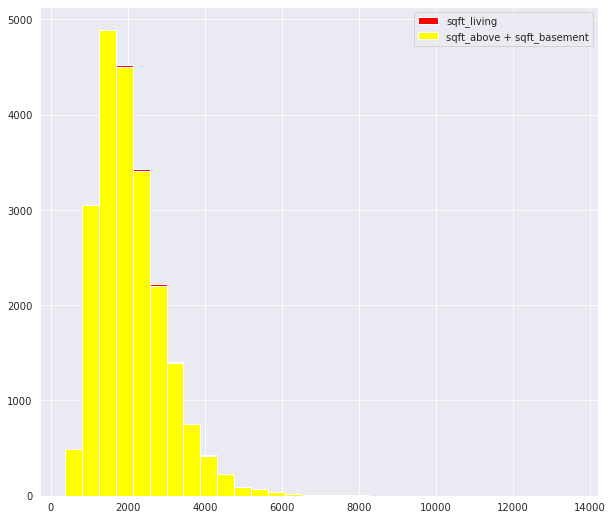

In [258]:
# Checking the function sqft_living = sqft_above + sqft_basement
plt.subplots(figsize = (10, 9))
plt.hist(data_anan["sqft_living"], bins = 30, color = "red", label = "sqft_living")
plt.hist(
    data_anan["sqft_above"] + data_anan["sqft_basement"],
    bins = 30,
    color = "yellow",
    label = "sqft_above + sqft_basement"
)
plt.legend()
plt.savefig("histplot of sqft_living");

From the histogram above, we see that the three columns we clearly related, we therefore could drop the sqft_living column because it can be derived from the other two columns.

In [13]:
# dropping the sqft_living column
# data_anan.drop("sqft_living", axis = 1, inplace = True)
# data_anan.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,5650,1.0,NaN,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


Creating a scatteplot of the variables in relation to our target variable. We create scatterplots of the different variables agains the target variable. We will ignore the id column as it appears to not provide any useful data for our analysis. While we do this, we will still be performing EDA, and, still prepare our data for modelling. We start with:

In [7]:
# Creating a function to plot scatterplot using seaborn
def plot_scatter(df, column_x, column_y):
    plt.subplots(figsize = (12, 8))
    sns.scatterplot(data = df, x = column_x, y = column_y)

#### 1. Checking on the zipcode column

In [37]:
data_anan["zipcode"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: zipcode
Non-Null Count  Dtype
--------------  -----
21597 non-null  int64
dtypes: int64(1)
memory usage: 168.9 KB


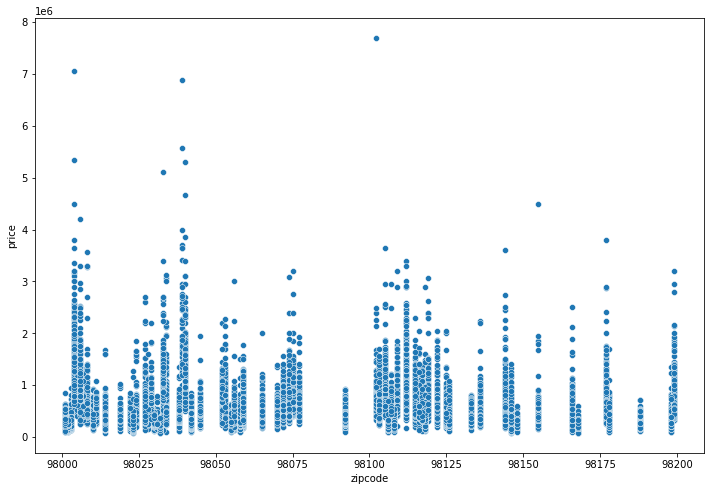

In [39]:
# Scatter of price against zipcode
# plt.subplots(figsize = (12, 8))
# sns.scatterplot(data = data_anan, x = "zipcode", y = "price");
plot_scatter(data_anan, "zipcode", "price")

From the plot above, we see that the zipcode column appears to be a categorical column. We check the number of unique values in the column below.

In [40]:
# Unique zipcodes count in the column
c = data_anan["zipcode"].nunique()
print(f"The number of unique zipcodes in the column are {c}.")

The number of unique zipcodes in the column are 70.


In [ ]:
# We could onehot encode the above column, but our dataset will grow by around 69 columns.
# Check on this later

#### 2. Bedrooms

In [11]:
data_anan["bedrooms"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: bedrooms
Non-Null Count  Dtype
--------------  -----
21597 non-null  int64
dtypes: int64(1)
memory usage: 168.9 KB


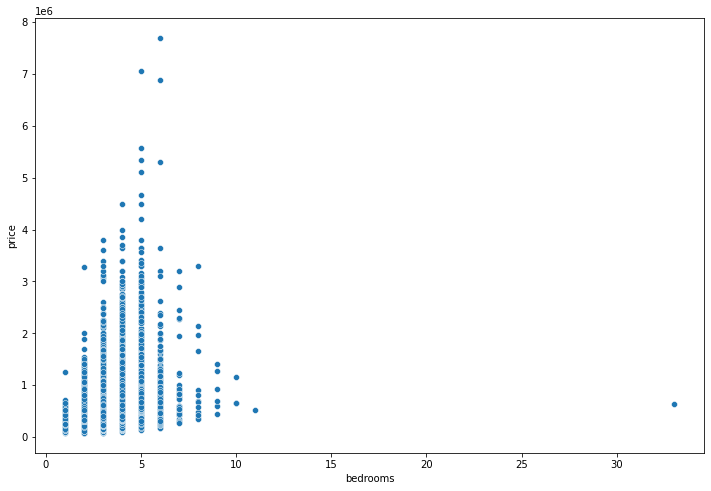

In [42]:
# Scatter of price against bedrooms
plot_scatter(data_anan, "bedrooms", "price")

Bedrooms are appear to be categorical variables. We have an outlier with over 30 bedrooms, we will look to remove the row containing this outlier.

In [8]:
# Dropping the row with the outlier
data_anan = data_anan[data_anan.bedrooms < 15]
data_anan.shape

(21596, 21)

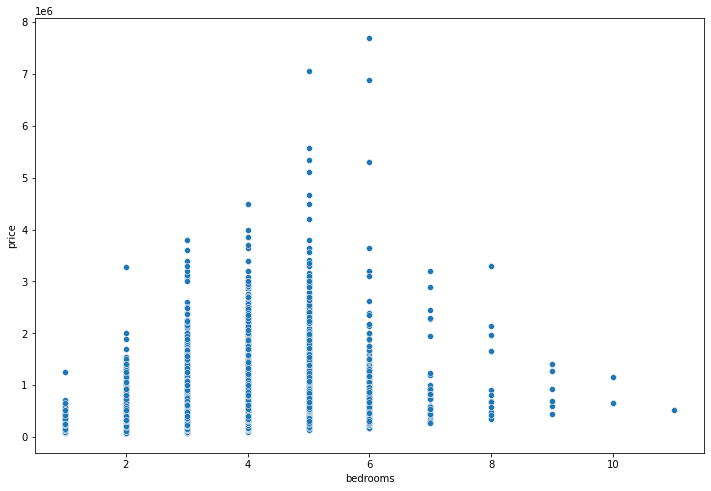

In [9]:
# Plotting the scatter plot again
plot_scatter(data_anan, "bedrooms", "price")
plt.savefig("bedrooms vs price")

We observed that average bedroom houses seem to be doing better in terms of house prices. We count the number of unique values in the column and then onehot encode it to ensure that it is a categorical variable.

In [45]:
data_anan["bedrooms"].nunique()

11

In [10]:
def bedroom_range(bedroom):
    """This function will be used to create ranges for values and assign them a given string category"""
    if 1 <= bedroom <= 2:
        return "one_two_bedrooms"
    elif 2 < bedroom <= 4:
        return "three_four_bedrooms"
    elif 4 < bedroom <= 6:
        return "five_six_bedrooms"
    else:
        return "ov_6_bedrooms"

In [11]:
data_anan["bedroom_range"] = data_anan["bedrooms"].apply(bedroom_range)
data_anan.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedroom_range
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,three_four_bedrooms
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,three_four_bedrooms
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,one_two_bedrooms
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,three_four_bedrooms
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,three_four_bedrooms


In [12]:
# Dropping bedrooms column
data_anan.drop("bedrooms", axis = 1, inplace = True)
data_anan.head()

,id,date,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedroom_range
0,7129300520,10/13/2014,221900.0,1.00,1180,5650,1.0,NaN,0.0,3,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,three_four_bedrooms
1,6414100192,12/9/2014,538000.0,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,three_four_bedrooms
2,5631500400,2/25/2015,180000.0,1.00,770,10000,1.0,0.0,0.0,3,...,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,one_two_bedrooms
3,2487200875,12/9/2014,604000.0,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,three_four_bedrooms
4,1954400510,2/18/2015,510000.0,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,three_four_bedrooms


In [13]:
# Creating a function to help us onehotencode columns
def ohe_col(df, column):
    """This function takes in the name of a dataframe and the categorical column name
    and then uses the oneHotEncoder method from Scikit learn to encode the column"""
    
    # Create a variable to hold the encoded
    column_vals = df[[column]]
    
    # Instatiating a oneHotEcoder with categories = "auto", sparse = False and handle_unknown = "ignore"
    ohe = OneHotEncoder(sparse = False, handle_unknown = "ignore")
    
    # fitting the ohe on the column_vals
    ohe.fit(column_vals)
    
    # Inspecting the categories of the fitted encoder
    print("The categories fitted are", ohe.categories_)
    
    # Transforming the column categories using the ohe and assigning the variable to a variable
    column_vals_encoded = ohe.transform(column_vals)
    
    # Print the transformed values
    print("Transformed data is: ", column_vals_encoded)
    
    # Changing the transformed data into a dataframe
    column_vals_encoded = pd.DataFrame(
        # Parsing in the numpy array
        column_vals_encoded,
        # Setting column names as categories found by OHE
        columns = ohe.categories_[0],
        # Setting index to match the df index
        index=df.index
    )
    
    return column_vals_encoded

In [14]:
bedroom_ohe = ohe_col(data_anan, "bedroom_range")
bedroom_ohe

The categories fitted are [array(['five_six_bedrooms', 'one_two_bedrooms', 'ov_6_bedrooms',
       'three_four_bedrooms'], dtype=object)]
Transformed data is:  [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


,five_six_bedrooms,one_two_bedrooms,ov_6_bedrooms,three_four_bedrooms
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
21592,0.0,0.0,0.0,1.0
21593,0.0,0.0,0.0,1.0
21594,0.0,1.0,0.0,0.0
21595,0.0,0.0,0.0,1.0


In [15]:
bedroom_ohe.head()

,five_six_bedrooms,one_two_bedrooms,ov_6_bedrooms,three_four_bedrooms
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [16]:
# Dropping the bedrooms column and concatinating the encoded values to the data frame
data_anan.drop("bedroom_range", axis = 1, inplace = True)
data_anan = pd.concat([data_anan, bedroom_ohe], axis = 1)
data_anan.head()

,id,date,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,five_six_bedrooms,one_two_bedrooms,ov_6_bedrooms,three_four_bedrooms
0,7129300520,10/13/2014,221900.0,1.00,1180,5650,1.0,NaN,0.0,3,...,0.0,98178,47.5112,-122.257,1340,5650,0.0,0.0,0.0,1.0
1,6414100192,12/9/2014,538000.0,2.25,2570,7242,2.0,0.0,0.0,3,...,1991.0,98125,47.7210,-122.319,1690,7639,0.0,0.0,0.0,1.0
2,5631500400,2/25/2015,180000.0,1.00,770,10000,1.0,0.0,0.0,3,...,NaN,98028,47.7379,-122.233,2720,8062,0.0,1.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,3.00,1960,5000,1.0,0.0,0.0,5,...,0.0,98136,47.5208,-122.393,1360,5000,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,510000.0,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,98074,47.6168,-122.045,1800,7503,0.0,0.0,0.0,1.0


#### 3. Bathrooms

In [53]:
data_anan["bathrooms"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: bathrooms
Non-Null Count  Dtype  
--------------  -----  
21596 non-null  float64
dtypes: float64(1)
memory usage: 337.4 KB


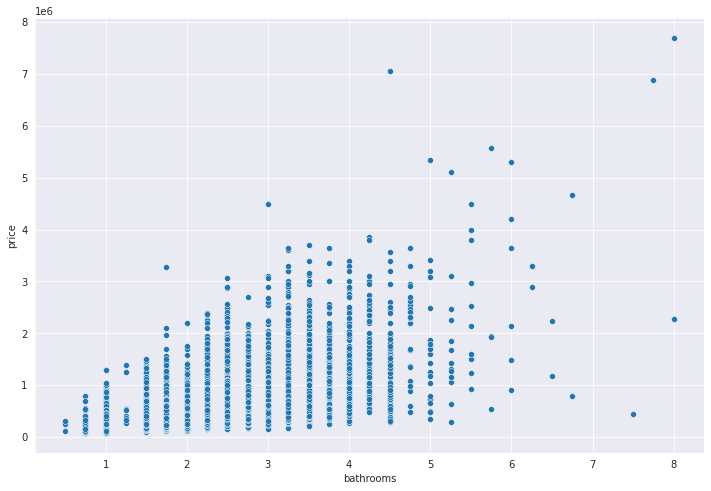

In [270]:
plot_scatter(data_anan, "bathrooms", "price")
plt.savefig("bathrooms vs price")

In [55]:
data_anan["bathrooms"].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [17]:
def bath_range(bathroom):
    """This function will be used to create ranges for values and assign them a given string category"""
    if bathroom <= 1:
        return "one_bathroom_below"
    elif 1 < bathroom <= 3:
        return "two_three_bathrooms"
    elif 3 < bathroom <= 5:
        return "four_five_bathrooms"
    else:
        return "over_5_bathrooms"

In [18]:
data_anan["bathrooms_range"] = data_anan["bathrooms"].apply(bath_range)
data_anan.head()

,id,date,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,five_six_bedrooms,one_two_bedrooms,ov_6_bedrooms,three_four_bedrooms,bathrooms_range
0,7129300520,10/13/2014,221900.0,1.00,1180,5650,1.0,NaN,0.0,3,...,98178,47.5112,-122.257,1340,5650,0.0,0.0,0.0,1.0,one_bathroom_below
1,6414100192,12/9/2014,538000.0,2.25,2570,7242,2.0,0.0,0.0,3,...,98125,47.7210,-122.319,1690,7639,0.0,0.0,0.0,1.0,two_three_bathrooms
2,5631500400,2/25/2015,180000.0,1.00,770,10000,1.0,0.0,0.0,3,...,98028,47.7379,-122.233,2720,8062,0.0,1.0,0.0,0.0,one_bathroom_below
3,2487200875,12/9/2014,604000.0,3.00,1960,5000,1.0,0.0,0.0,5,...,98136,47.5208,-122.393,1360,5000,0.0,0.0,0.0,1.0,two_three_bathrooms
4,1954400510,2/18/2015,510000.0,2.00,1680,8080,1.0,0.0,0.0,3,...,98074,47.6168,-122.045,1800,7503,0.0,0.0,0.0,1.0,two_three_bathrooms


In [318]:
data_anan[["bathrooms", "bathrooms_range"]].head(10)

,bathrooms,bathrooms_range
0,1.00,one_bathroom_below
1,2.25,two_three_bathrooms
2,1.00,one_bathroom_below
3,3.00,two_three_bathrooms
4,2.00,two_three_bathrooms
5,4.50,four_five_bathrooms
6,2.25,two_three_bathrooms
7,1.50,two_three_bathrooms
8,1.00,one_bathroom_below
9,2.50,two_three_bathrooms


The bathrooms column has enabled us to create a new column which has assigned. We can drop the bathrooms column, for the column with a ranges for the bathrooms which appears more practical withought falling for the curse of dimentionality.

In [19]:
data_anan.drop("bathrooms", axis = 1, inplace = True)
data_anan.head()

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,five_six_bedrooms,one_two_bedrooms,ov_6_bedrooms,three_four_bedrooms,bathrooms_range
0,7129300520,10/13/2014,221900.0,1180,5650,1.0,NaN,0.0,3,7,...,98178,47.5112,-122.257,1340,5650,0.0,0.0,0.0,1.0,one_bathroom_below
1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,...,98125,47.7210,-122.319,1690,7639,0.0,0.0,0.0,1.0,two_three_bathrooms
2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,6,...,98028,47.7379,-122.233,2720,8062,0.0,1.0,0.0,0.0,one_bathroom_below
3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,...,98136,47.5208,-122.393,1360,5000,0.0,0.0,0.0,1.0,two_three_bathrooms
4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,...,98074,47.6168,-122.045,1800,7503,0.0,0.0,0.0,1.0,two_three_bathrooms


We OneHotEncode the bathrooms_range and concatenate it to the dataframe.

In [20]:
bathrooms_range_ohe = ohe_col(data_anan, "bathrooms_range")
bathrooms_range_ohe

The categories fitted are [array(['four_five_bathrooms', 'one_bathroom_below', 'over_5_bathrooms',
       'two_three_bathrooms'], dtype=object)]
Transformed data is:  [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


,four_five_bathrooms,one_bathroom_below,over_5_bathrooms,two_three_bathrooms
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
21592,0.0,0.0,0.0,1.0
21593,0.0,0.0,0.0,1.0
21594,0.0,1.0,0.0,0.0
21595,0.0,0.0,0.0,1.0


In [21]:
# Dropping columns and concatinating the ohe dataframe
data_anan.drop("bathrooms_range", axis = 1, inplace = True)
data_anan = pd.concat([data_anan, bathrooms_range_ohe], axis = 1)
data_anan.head()

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,five_six_bedrooms,one_two_bedrooms,ov_6_bedrooms,three_four_bedrooms,four_five_bathrooms,one_bathroom_below,over_5_bathrooms,two_three_bathrooms
0,7129300520,10/13/2014,221900.0,1180,5650,1.0,NaN,0.0,3,7,...,1340,5650,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,...,1690,7639,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,6,...,2720,8062,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,...,1360,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,...,1800,7503,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### 4. Waterfront

In [63]:
data_anan["waterfront"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: waterfront
Non-Null Count  Dtype  
--------------  -----  
19220 non-null  float64
dtypes: float64(1)
memory usage: 337.4 KB


In [64]:
x = (((data_anan["waterfront"].isna().sum()) / len(data_anan)) * 100)
print("The percentage of missing values in waterfront column is around", round(x, 2))

The percentage of missing values in waterfront column is around 11.0


In [65]:
data_anan["waterfront"].value_counts()

0.0    19074
1.0      146
Name: waterfront, dtype: int64

The waterfront column contains two categories of data, with 0 indicating that it is not a waterfront property and 1 indicating it is a waterfront property. We need to come up with a way to determine if a property is a waterfront property or not. maybe a map of the area would do nicely.

In [ ]:
# Comeback to this later
# I find it difficult to determine which houses are waterfront properties
# I would have been better if we could estimate the waterfront properties vicinity.
# I have decided to drop this column all together
# I feel it would not be beneficial to drop over 2000 rows for a specific column
# 

We select a random sample from the dataset which contains NaN values in the waterfront column and compare to their latitudes and longitude. Our aim is to try and fill as much of the values before dropping the rows all together. We first create a copy of the data to experiment on.

In [22]:
waterfront = data_anan[["waterfront", "lat", "long"]]
waterfront.head()

,waterfront,lat,long
0,NaN,47.5112,-122.257
1,0.0,47.7210,-122.319
2,0.0,47.7379,-122.233
3,0.0,47.5208,-122.393
4,0.0,47.6168,-122.045


In [23]:
# null on waterfront columns
waterfront_null = waterfront[waterfront["waterfront"].isna()]
waterfront_null.head()

,waterfront,lat,long
0,NaN,47.5112,-122.257
10,NaN,47.6007,-122.145
23,NaN,47.3533,-122.166
40,NaN,47.6145,-122.027
55,NaN,47.6597,-122.290


In [24]:
max_lat = waterfront_null["lat"].max()
min_lat = waterfront_null["lat"].min()
max_lon = waterfront_null["long"].max()
min_lon = waterfront_null["long"].min()

print("The NaN water front coordinates are")
print(f"The max latitude {max_lat} and min latitude {min_lat}")
print(f"The max longitude {max_lon} and min longitude {min_lon}")

The NaN water front coordinates are
The max latitude 47.7774 and min latitude 47.1808
The max longitude -121.319 and min longitude -122.503


In [25]:
# With waterfront in the columns
with_waterfront= waterfront[waterfront["waterfront"] == 1.0]
with_waterfront.head()

,waterfront,lat,long
49,1.0,47.4041,-122.451
230,1.0,47.4497,-122.375
246,1.0,47.6338,-122.072
264,1.0,47.4683,-122.438
300,1.0,47.6053,-122.077


In [26]:
max_lat = with_waterfront["lat"].max()
min_lat = with_waterfront["lat"].min()
max_lon = with_waterfront["long"].max()
min_lon = with_waterfront["long"].min()

print("The homes with waterfront coordinates are")
print(f"The max latitude {max_lat} and min latitude {min_lat}")
print(f"The max longitude {max_lon} and min longitude {min_lon}")

The homes with waterfront coordinates are
The max latitude 47.7729 and min latitude 47.3276
The max longitude -122.059 and min longitude -122.514


We only need coordinate limits for waterfront homes, we do not need to compile for those which are not waterfront homes.

In [27]:
# We define the condition which will help impute estimates on our missing values
condition = (
    (waterfront_null["lat"] > 47.3276) & (waterfront_null["lat"] < 47.7729) &
    (waterfront_null["long"] > -122.514) & (waterfront_null["long"] < -122.059) &
    (waterfront_null["waterfront"].isna() == True)
)
condition

0         True
10        True
23        True
40       False
55        True
         ...  
21578     True
21582    False
21586    False
21587    False
21595     True
Length: 2376, dtype: bool

In [28]:
# We impute the value 1.0 which satisfy the above condition and 0 where the condition is not met
waterfront_null["waterfront"] = np.where(condition, 1, 0)
waterfront_null.head()

<ipython-input-28-da719d868587>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waterfront_null["waterfront"] = np.where(condition, 1, 0)


,waterfront,lat,long
0,1,47.5112,-122.257
10,1,47.6007,-122.145
23,1,47.3533,-122.166
40,0,47.6145,-122.027
55,1,47.6597,-122.290


Given that the condition works, we will now apply it to the dataframe we are working on. First we redefine the condition to match the length of the main dataframe. We do that below:

In [29]:
# We define the condition which will help impute estimates on our missing values
condition_main = (
    (data_anan["lat"] > 47.3276) & (data_anan["lat"] < 47.7729) &
    (data_anan["long"] > -122.514) & (data_anan["long"] < -122.059) &
    (data_anan["waterfront"].isna() == True)
)

In [30]:
data_anan["waterfront"] = np.where(condition_main, 1, 0)
data_anan.head()

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,five_six_bedrooms,one_two_bedrooms,ov_6_bedrooms,three_four_bedrooms,four_five_bathrooms,one_bathroom_below,over_5_bathrooms,two_three_bathrooms
0,7129300520,10/13/2014,221900.0,1180,5650,1.0,1,0.0,3,7,...,1340,5650,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0,0.0,3,7,...,1690,7639,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,5631500400,2/25/2015,180000.0,770,10000,1.0,0,0.0,3,6,...,2720,8062,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0,0.0,5,7,...,1360,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0,0.0,3,8,...,1800,7503,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [34]:
data_anan["waterfront"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: waterfront
Non-Null Count  Dtype
--------------  -----
21596 non-null  int64
dtypes: int64(1)
memory usage: 337.4 KB


Very nice. We have estimated the number of properties which may have a waterfront view based on the coordinate estimates. Took values in a grid and used that to approximate possible waterfront homes. The column already contains zeros and ones, we view it not necessary to encode it.

#### 4. Year Renovated

In [202]:
data_anan["yr_renovated"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: yr_renovated
Non-Null Count  Dtype  
--------------  -----  
17754 non-null  float64
dtypes: float64(1)
memory usage: 337.4 KB


In [203]:
x = (((data_anan["yr_renovated"].isna().sum()) / len(data_anan)) * 100)
print("The percent of missing values in the yr_renovated column is ", round(x, 2))

The percent of missing values in the yr_renovated column is  17.79


In [204]:
data_anan["yr_renovated"].value_counts()

0.0       17010
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [206]:
(data_anan["yr_renovated"] != 0).sum()

4586

The column is a numeric column with some unique values. However we have observed most of the column actually around 78% of the data entries are zeros. Can it be a categorical variable? Lets plot it against price and observe the distribution.

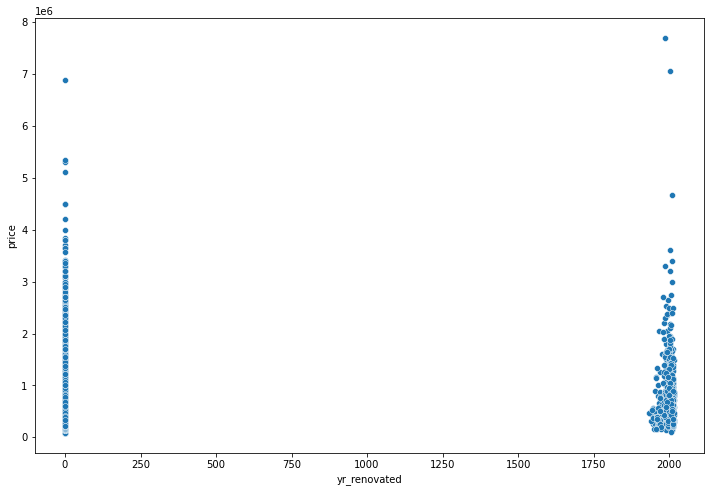

In [207]:
plot_scatter(data_anan, "yr_renovated", "price")

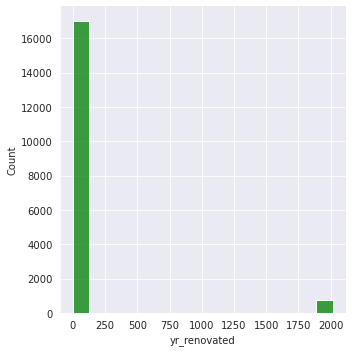

In [208]:
sns.set_style("darkgrid")
sns.displot(data_anan["yr_renovated"], kde = False, color = "green", bins = "auto");

This column could be a prime candidate for dropping. However we could do with a check on houses which have ever had a renovation and the period it took for the sale to occur. We could be required to create a column to accomodate this assumptions probably.

#### 5. Year built

In [209]:
data_anan["yr_built"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: yr_built
Non-Null Count  Dtype
--------------  -----
21596 non-null  int64
dtypes: int64(1)
memory usage: 337.4 KB


There are no missing values in this column. We can check the count of unique values in the column.

In [210]:
data_anan["yr_built"].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

We could use this columnm with the date column to create the age of the house column.

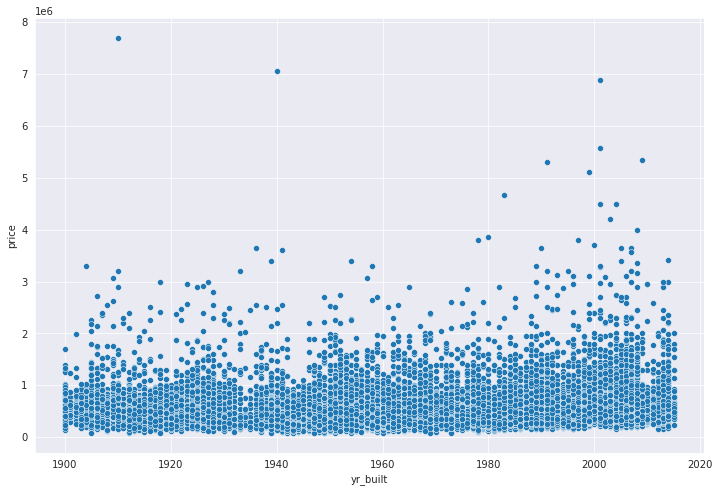

In [211]:
plot_scatter(data_anan, "yr_built", "price")

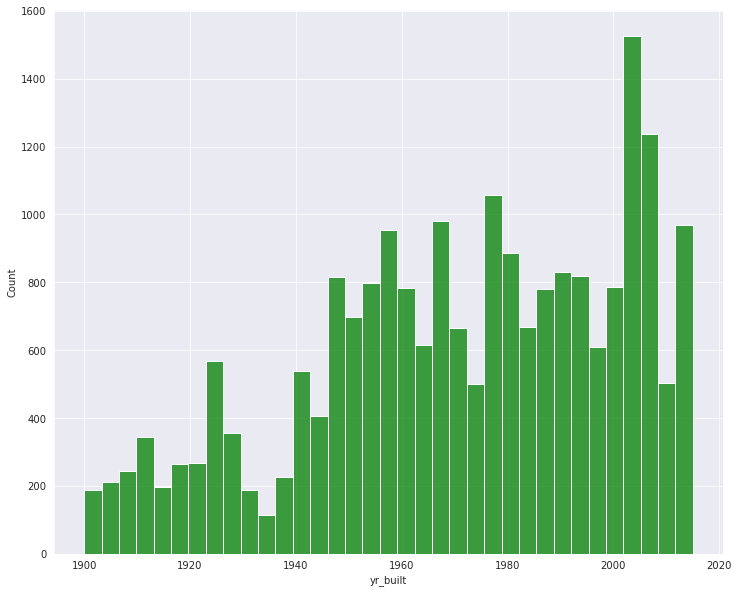

In [31]:
def plot_dist(df, column):
    """This function creates a distribution plot of a given column"""
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize = (12, 10))
    sns.histplot(data = df, x = column, bins = "auto", color = "green");

plot_dist(data_anan, "yr_built")
# plt.savefig("Building of houses over time")

House construction has been on the increase since 1900.

In [215]:
data_anan.head()

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,1 or 2 bedrooms,3 or 4 bedrooms,5 or 6 bedrooms,over 6 bedrooms,1 bathroom or below,2 or 3 bathrooms,4 or 5 bathrooms,over 5 bathrooms
0,7129300520,10/13/2014,221900.0,1180,5650,1.0,1,0.0,3,7,...,1340,5650,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0,0.0,3,7,...,1690,7639,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,770,10000,1.0,0,0.0,3,6,...,2720,8062,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0,0.0,5,7,...,1360,5000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0,0.0,3,8,...,1800,7503,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


#### 6. Date sold

In [213]:
data_anan["date"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
21596 non-null  object
dtypes: object(1)
memory usage: 337.4+ KB


There are no missing values in the column. We will convert this to date only with year and then create a column which derives the age of the house at the time of selling. I don't think it is necessary for us to visualize it against the house price.

In [32]:
data_anan["date"] = [x[-4:] for x in data_anan.date]
data_anan["date"].head()

0    2014
1    2014
2    2015
3    2014
4    2015
Name: date, dtype: object

In [33]:
# Changing the date column to an integer column
data_anan["date"] = data_anan["date"].astype(str).astype(float).astype(int)
data_anan["date"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: date
Non-Null Count  Dtype
--------------  -----
21596 non-null  int64
dtypes: int64(1)
memory usage: 337.4 KB


We create a new column called house_age. This column will be obtained by obtaining the difference between the year the house was sold and the year it was built.

In [34]:
data_anan["house_age"] = abs(data_anan["date"] - data_anan["yr_built"])
data_anan.head()

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,five_six_bedrooms,one_two_bedrooms,ov_6_bedrooms,three_four_bedrooms,four_five_bathrooms,one_bathroom_below,over_5_bathrooms,two_three_bathrooms,house_age
0,7129300520,2014,221900.0,1180,5650,1.0,1,0.0,3,7,...,5650,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,59
1,6414100192,2014,538000.0,2570,7242,2.0,0,0.0,3,7,...,7639,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,63
2,5631500400,2015,180000.0,770,10000,1.0,0,0.0,3,6,...,8062,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,82
3,2487200875,2014,604000.0,1960,5000,1.0,0,0.0,5,7,...,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49
4,1954400510,2015,510000.0,1680,8080,1.0,0,0.0,3,8,...,7503,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,28


Plotting the new created column, house_age against the price to get a better understanding of the general distribution.

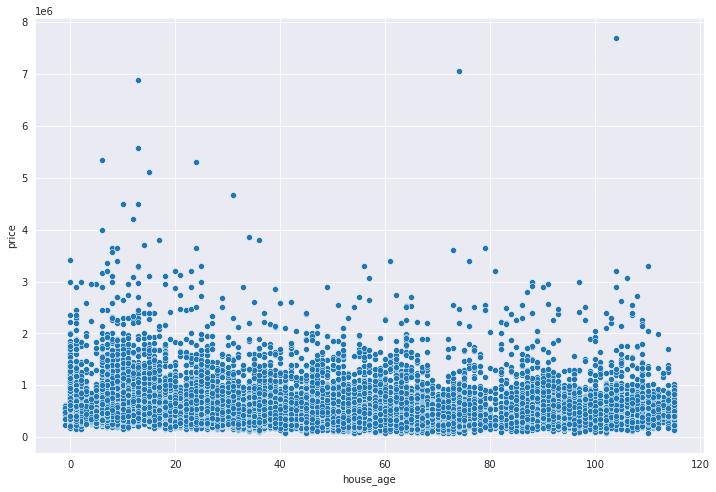

In [223]:
plot_scatter(data_anan, "house_age", "price")

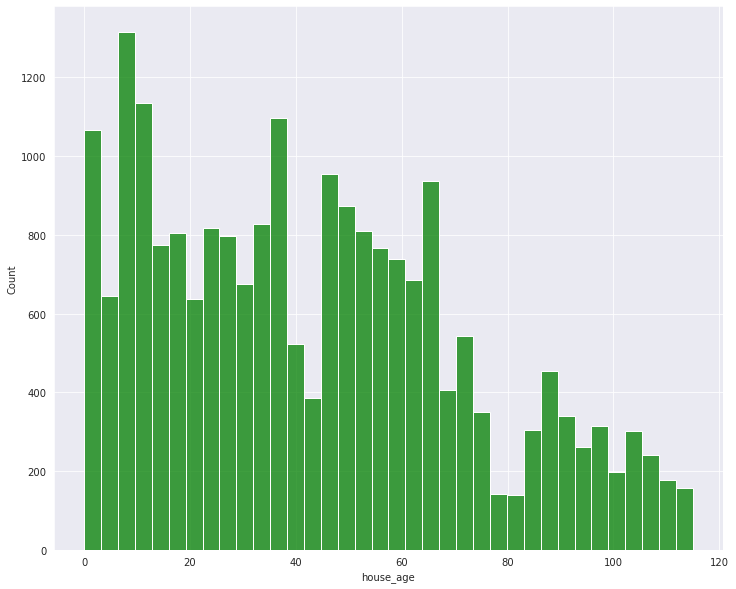

In [31]:
plot_dist(data_anan, "house_age")

It appears newer homes sale more often compared to older homes.

#### 7. sqft_lot

In [225]:
data_anan["sqft_lot"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: sqft_lot
Non-Null Count  Dtype
--------------  -----
21596 non-null  int64
dtypes: int64(1)
memory usage: 853.5 KB


There are no missing values. We will look to plot the sqft_lot against price and see if there is any relationship among them.

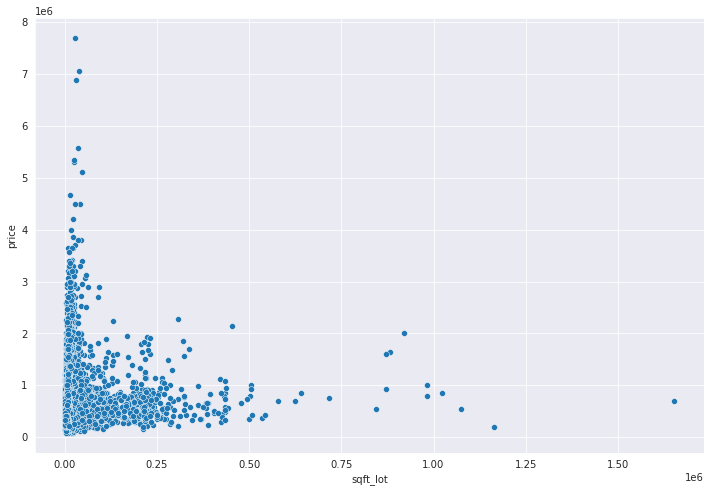

In [226]:
plot_scatter(data_anan, "sqft_lot", "price")

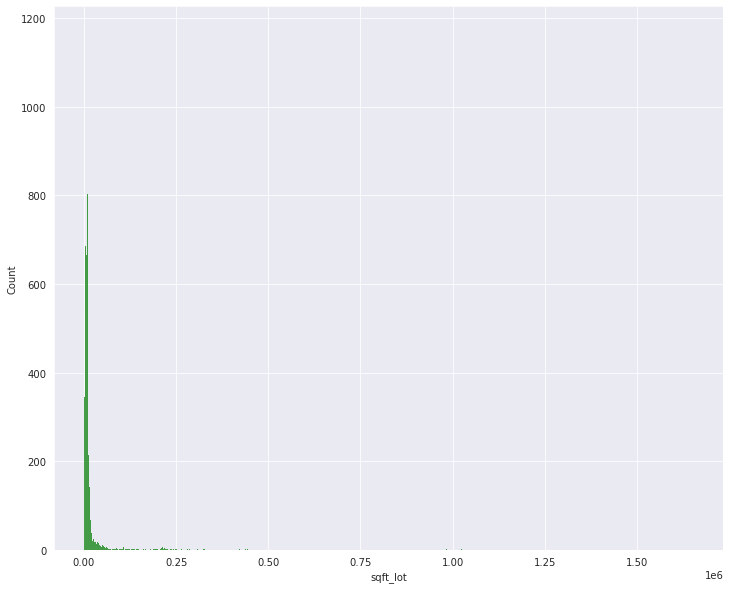

In [106]:
plot_dist(data_anan, "sqft_lot")

There seems to be no linear relationship between the price and sqft_lot. We could try transforming the variable in order to get a better understanding. Let us copy the the price and sqft_lot columns into a new variable, log transform the sqft_lot column, and observer if their general distribution changes.

In [227]:
# Copying the price and sqft_lot columns to a new variable and normalizing the
# sqft_lot colum using logarithms
x_vars = data[["price", "sqft_lot"]].copy()
x_vars["sqft_lot"] = x_vars["sqft_lot"].map(lambda x: np.log(x))
x_vars["sqft_lot"].head()

0    8.639411
1    8.887653
2    9.210340
3    8.517193
4    8.997147
Name: sqft_lot, dtype: float64

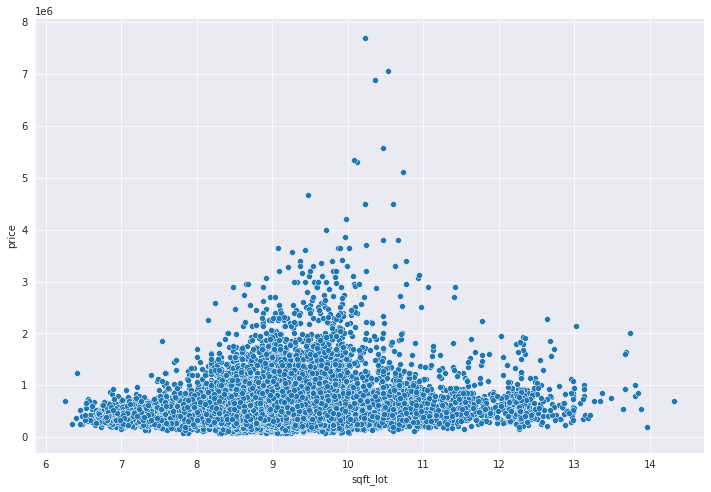

In [228]:
plot_scatter(x_vars, "sqft_lot", "price")

We still do not have a linear relationship between the price column and the transformed sqft_lot values. It could be a candidate for dropping the values. That may be the case given that we have not looked at the price column, therefore we reserve judgement untill we look at the price column.

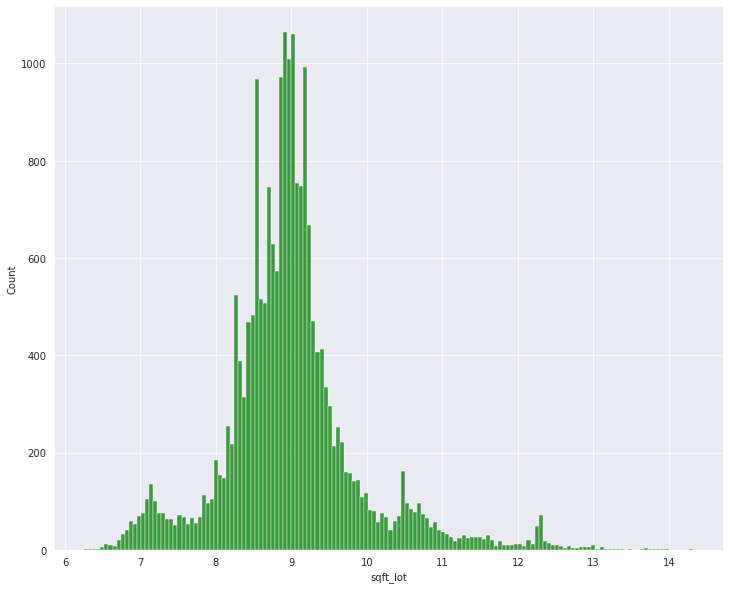

In [229]:
plot_dist(x_vars, "sqft_lot")

The distribution of the transformed sqft_lot has shown significant improved, therefore we recommend transforming the column in the main column in the data_anan dataframe. We will log transform the variable in the next cell on the analysis dataframe.

In [35]:
# log transforming the column sqft_lot log on the data_anan dataframe
data_anan["sqft_lot"] = data_anan["sqft_lot"].map(lambda x: np.log(x))
data_anan["sqft_lot"].head()

0    8.639411
1    8.887653
2    9.210340
3    8.517193
4    8.997147
Name: sqft_lot, dtype: float64

In [36]:
# scale
j = data_anan["sqft_lot"]
scaled_a = (j - min(j)) / (max(j) - min(j))

data_anan["house_age"] = scaled_a

#### 8. sqft_lot15

In [231]:
data_anan["sqft_lot15"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: sqft_lot15
Non-Null Count  Dtype
--------------  -----
21596 non-null  int64
dtypes: int64(1)
memory usage: 853.5 KB


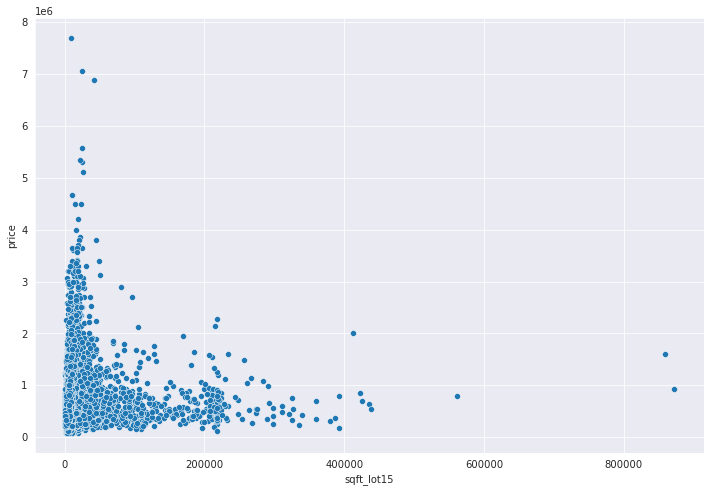

In [232]:
plot_scatter(data_anan, "sqft_lot15", "price")

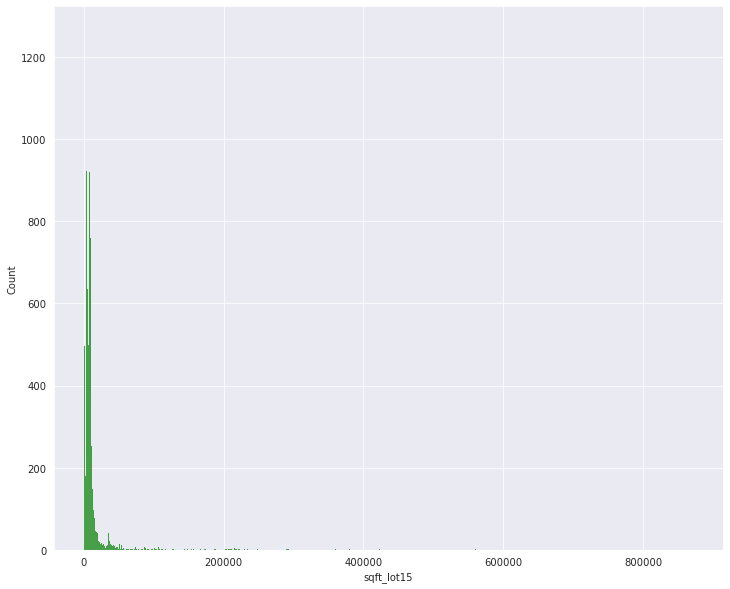

In [233]:
plot_dist(data_anan, "sqft_lot15")

This column is almost similar to the sqft_lot column, they may be related, it would be prudent to drop one or both of these columns. Let us check if we transform the column if the distribution improves.

In [28]:
# Copying the price and sqft_lot15 columns to a new variable and normalizing the
# sqft_lot15 colum using logarithms
x_vars = data_anan[["price", "sqft_lot15"]].copy()
x_vars["sqft_lot15"] = x_vars["sqft_lot15"].map(lambda x: np.log(x))
x_vars["sqft_lot15"].head()

0    2.156334
1    2.190650
2    2.196660
3    2.142087
4    2.188639
Name: sqft_lot15, dtype: float64

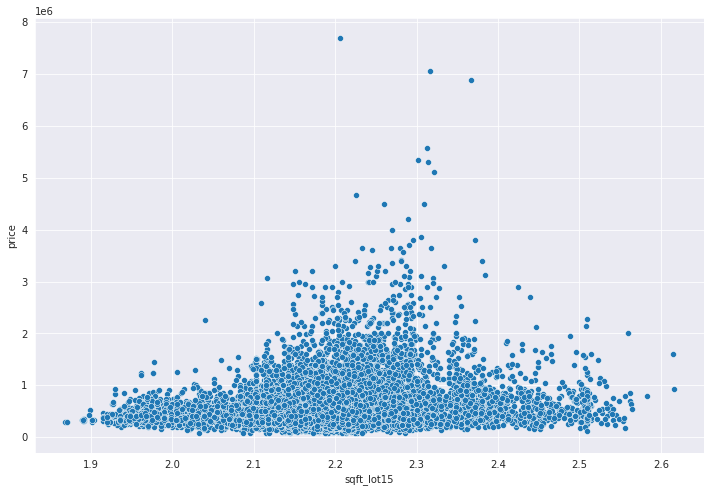

In [29]:
plot_scatter(x_vars, "sqft_lot15", "price")

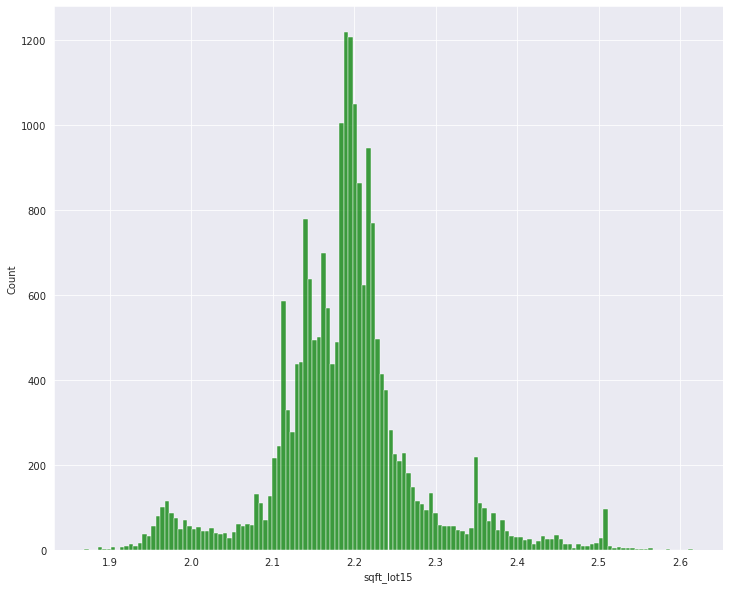

In [30]:
plot_dist(x_vars, "sqft_lot15")

As we suspected these two columns may be somehow related. The distributions seem to be near identical. They should be prime candidates for dropping either one or both. Below we transform this column in the analysis dataframe.

In [37]:
# log transforming the column sqft_lot15 log on the data_anan dataframe
data_anan["sqft_lot15"] = data_anan["sqft_lot15"].map(lambda x: np.log(x))
data_anan["sqft_lot15"].head()

0    8.639411
1    8.941022
2    8.994917
3    8.517193
4    8.923058
Name: sqft_lot15, dtype: float64

#### 9. sqft_living

In [235]:
data_anan["sqft_living"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: sqft_living
Non-Null Count  Dtype
--------------  -----
21596 non-null  int64
dtypes: int64(1)
memory usage: 853.5 KB


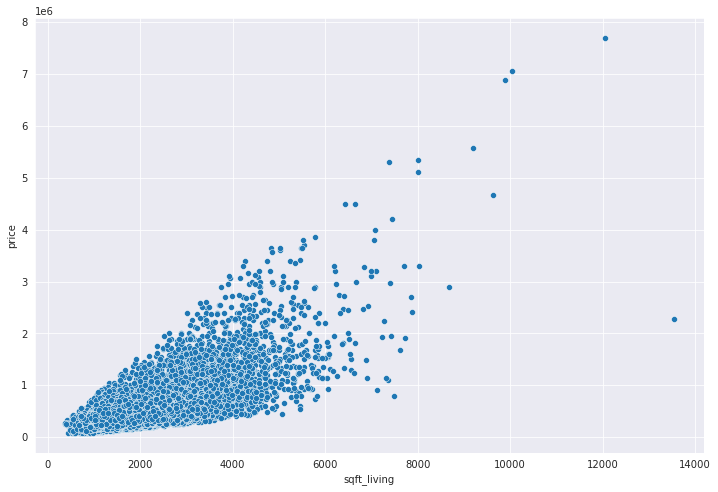

In [283]:
plot_scatter(data_anan, "sqft_living", "price")
plt.savefig("Scatter of sqft_living vs price")

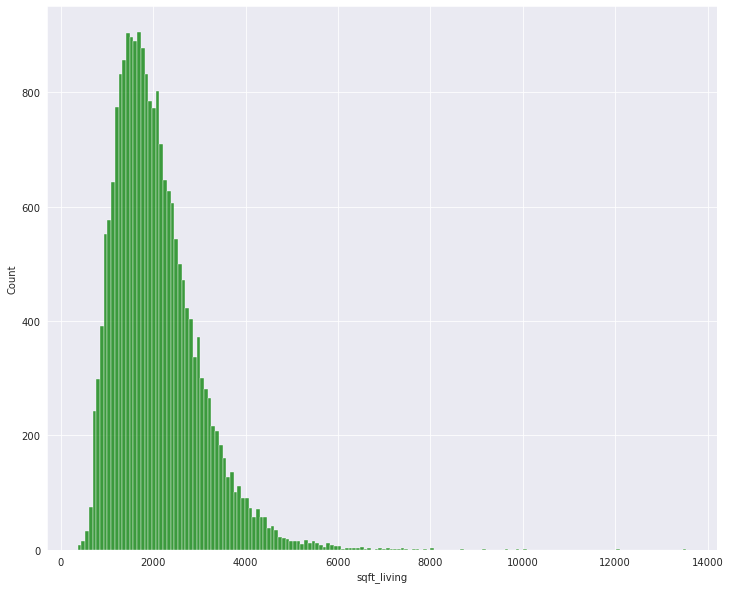

In [237]:
plot_dist(data_anan, "sqft_living")

There appears to be some sort of relationship as between sqft_living and price. We can not say if it is linear relationship, there is too much inconsistency in the independent variable(sqft_living) being plotted against the dependent variable(price). However we note that the sqft_living variable is normally distributed although somewhat skewed to the right. Therefore there may be no need to transform this column. We attempt that below:

In [238]:
x_vars = data_anan[["price", "sqft_living"]].copy()
x_vars["sqft_living"] = x_vars["sqft_living"].map(lambda x: np.log(x))
x_vars["sqft_living"].head()

0    7.073270
1    7.851661
2    6.646391
3    7.580700
4    7.426549
Name: sqft_living, dtype: float64

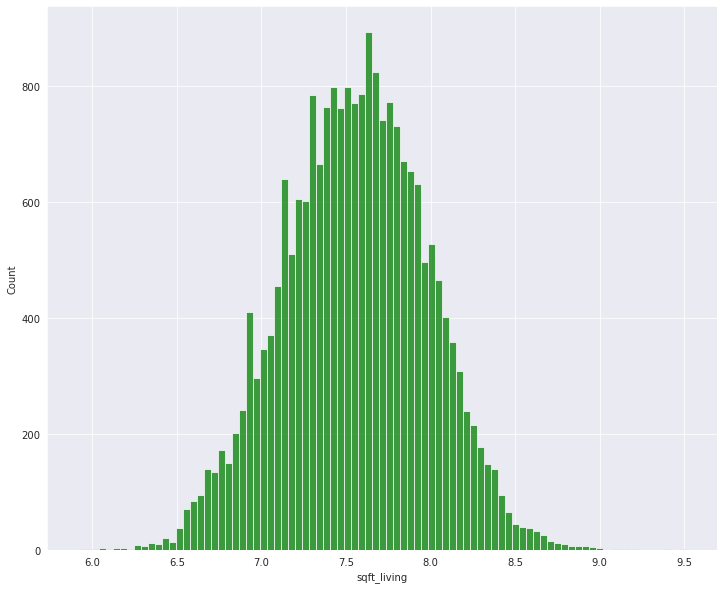

In [239]:
plot_dist(x_vars, "sqft_living")

The distribution for the sqft_living has improved slightly and therefore we transform this column in the analysis dataframe below:

In [38]:
# log transforming the column sqft_lot15 log on the data_anan dataframe
data_anan["sqft_living"] = data_anan["sqft_living"].map(lambda x: np.log(x))
data_anan["sqft_living"].head()

0    7.073270
1    7.851661
2    6.646391
3    7.580700
4    7.426549
Name: sqft_living, dtype: float64

#### 10. sqft_above

In [241]:
data_anan["sqft_above"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: sqft_above
Non-Null Count  Dtype
--------------  -----
21596 non-null  int64
dtypes: int64(1)
memory usage: 853.5 KB


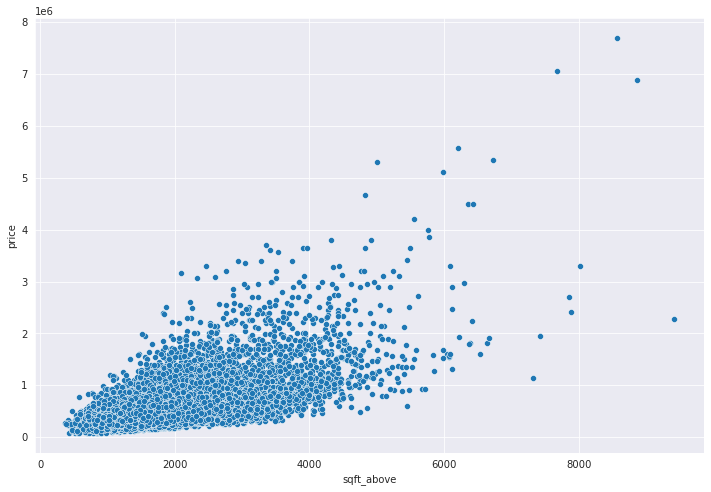

In [242]:
plot_scatter(data_anan, "sqft_above", "price")

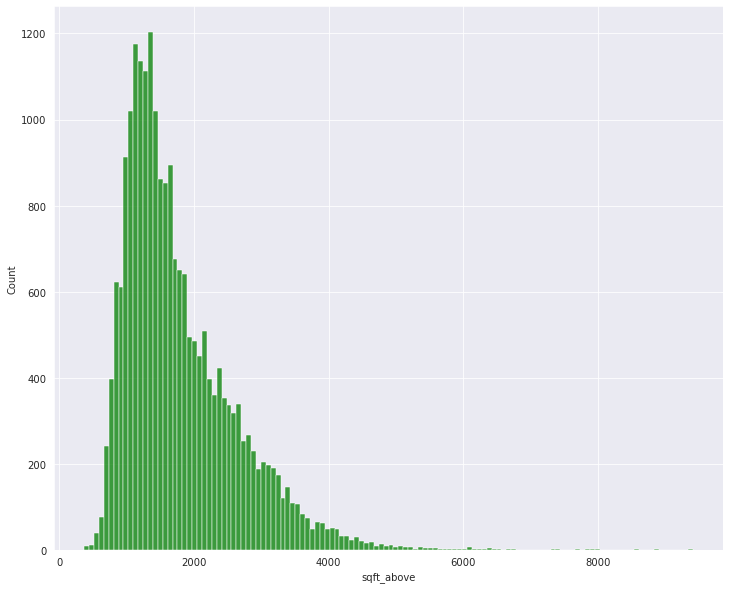

In [243]:
plot_dist(data_anan, "sqft_above")

Just as above the sqft_living column, sqft_above column appears to have some relationship with the price. However the distributions plotted against the price appear to not be consistent enough for us to declare a relationship. Seeing that the column sqft_above is somehow normaly distributed, we see no need to transform it.

In [244]:
x_vars = data_anan[["price", "sqft_above"]].copy()
x_vars["sqft_above"] = x_vars["sqft_above"].map(lambda x: np.log(x))
x_vars["sqft_above"].head()

0    7.073270
1    7.682482
2    6.646391
3    6.956545
4    7.426549
Name: sqft_above, dtype: float64

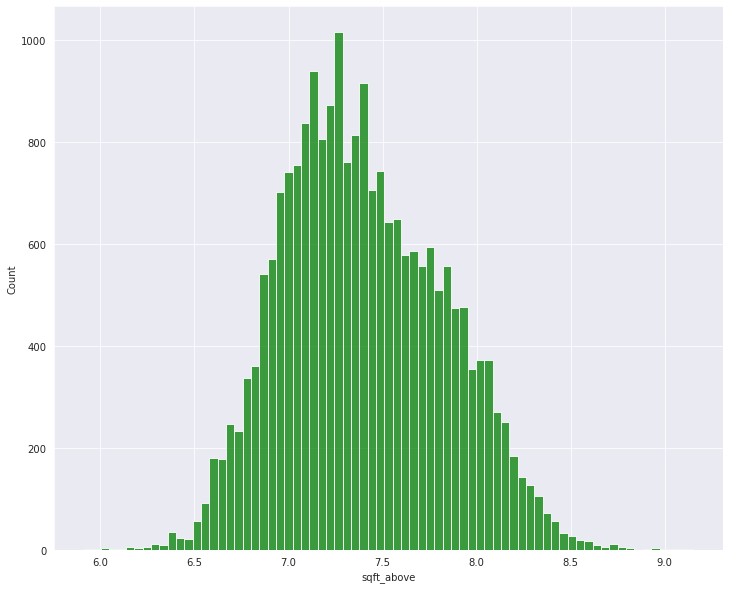

In [246]:
plot_dist(x_vars, "sqft_above")

Given the improvement in the distribution, we will transform this column in the analysis dataframe below:

In [39]:
# log transforming the column sqft_lot15 log on the data_anan dataframe
data_anan["sqft_above"] = data_anan["sqft_above"].map(lambda x: np.log(x))
data_anan["sqft_above"].head()

0    7.073270
1    7.682482
2    6.646391
3    6.956545
4    7.426549
Name: sqft_above, dtype: float64

In [ ]:
# Check scaling

#### 11. sqft_basement

In [248]:
data_anan["sqft_basement"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: sqft_basement
Non-Null Count  Dtype
--------------  -----
21596 non-null  int64
dtypes: int64(1)
memory usage: 853.5 KB


In [249]:
data_anan["sqft_basement"].value_counts()

0       13280
600       217
500       209
700       208
800       201
        ...  
1920        1
3480        1
2730        1
2720        1
248         1
Name: sqft_basement, Length: 303, dtype: int64

We observe many values in the column are zeros(about 61% of the data) which indicate that most houses lacked a basement. This column could be a candidate for dropping.

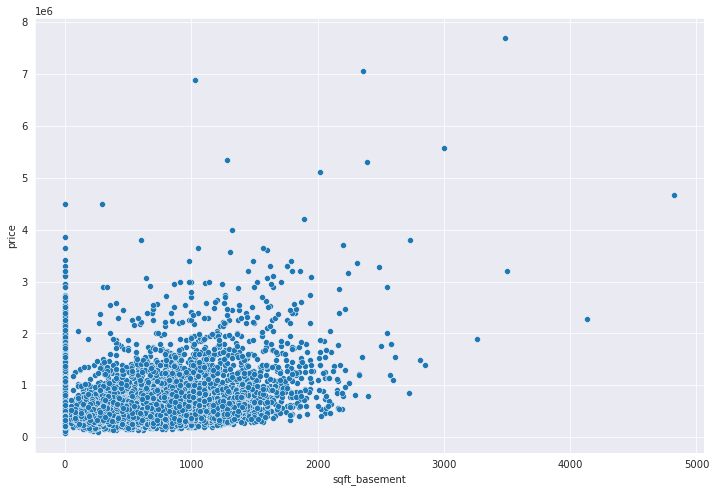

In [250]:
plot_scatter(data_anan, "sqft_basement", "price")

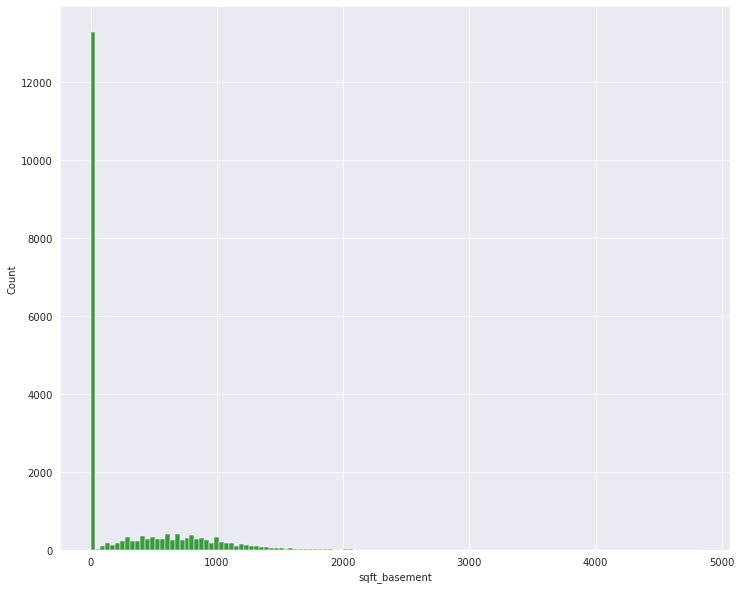

In [251]:
plot_dist(data_anan, "sqft_basement")

We observe that the distribution plot has no definitive distribution and we may look to drop this column. But first let us investigate it through scaling it first: 

<ipython-input-51-9c34e92cf24a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_vars["scaled"] = a_sca


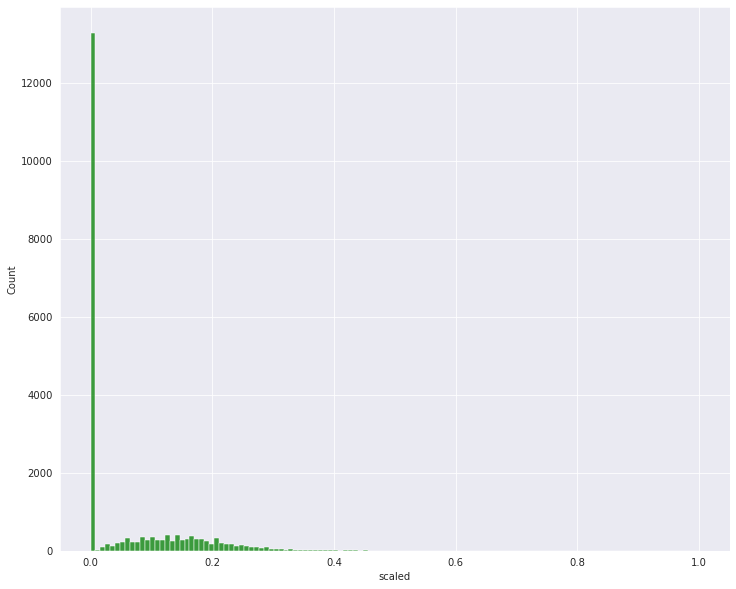

In [51]:
x_vars = data_anan[["price", "sqft_basement"]]
x_vars["scaled"] = a_sca

plot_dist(x_vars, "scaled")

The column still has multiple zero values so we may look to drop it. The distribution has not improved much. This could be dropped later.

#### 12. grade

In [252]:
data_anan["grade"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: grade
Non-Null Count  Dtype
--------------  -----
21596 non-null  int64
dtypes: int64(1)
memory usage: 853.5 KB


In [253]:
data_anan["grade"].value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

There are no missing values. The column appears to be a categrical value and hence would need to be OneHotEncoded for analysis. first we investigate its' relationship to the target variable.

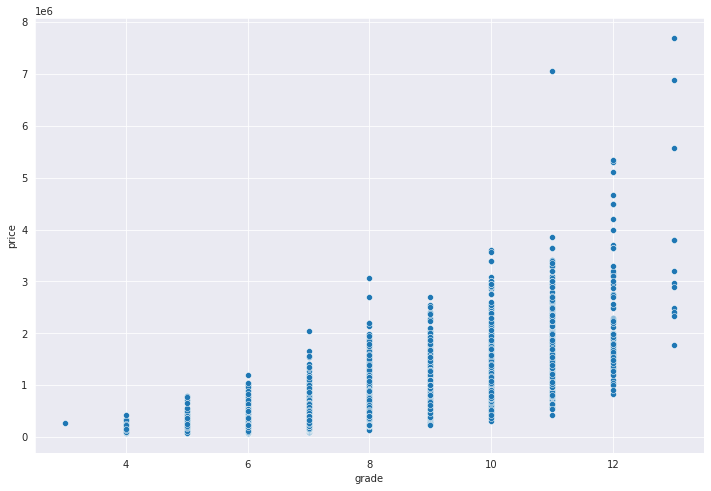

In [284]:
plot_scatter(data_anan, "grade", "price")
plt.savefig("grade vs price")

In [ ]:
# High grade high price increase

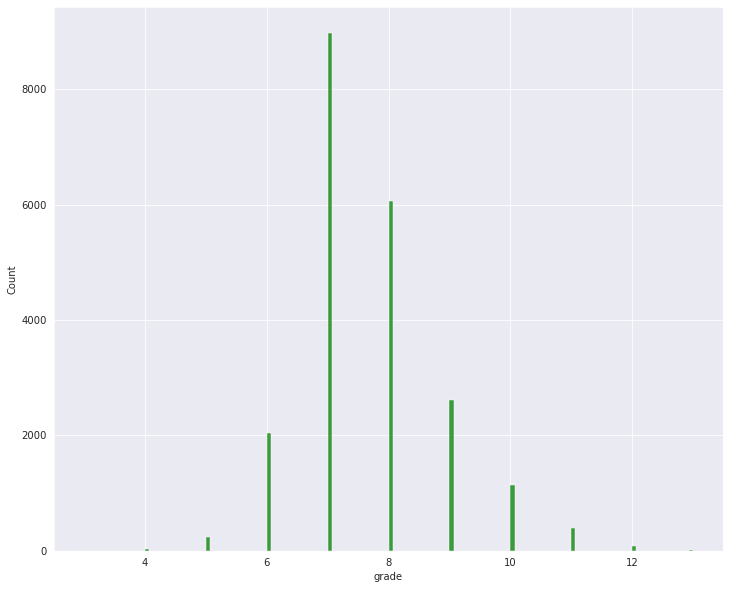

In [255]:
plot_dist(data_anan, "grade")

The column variable is normaly distributed. We break this column into ranges and use it to create new colum with more definitive categories.

In [40]:
def grade_range(grade):
    """This function will be used to create ranges for values and assign them a given string category"""
    if 1 <= grade <=3:
        return "poor_quality_grade"
    elif 3 < grade <= 6:
        return "low_quality_grade"
    elif 6 < grade <= 8:
        return "average_quality_grade"
    elif 8 < grade <= 10:
        return "high_quality_grade"
    else:
        return "custom_highest_quality"

In [41]:
data_anan["grade ratings"] = data_anan["grade"].apply(grade_range)
data_anan.head()

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,five_six_bedrooms,one_two_bedrooms,ov_6_bedrooms,three_four_bedrooms,four_five_bathrooms,one_bathroom_below,over_5_bathrooms,two_three_bathrooms,house_age,grade ratings
0,7129300520,2014,221900.0,7.073270,8.639411,1.0,1,0.0,3,7,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.295858,average_quality_grade
1,6414100192,2014,538000.0,7.851661,8.887653,2.0,0,0.0,3,7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.326644,average_quality_grade
2,5631500400,2015,180000.0,6.646391,9.210340,1.0,0,0.0,3,6,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.366664,low_quality_grade
3,2487200875,2014,604000.0,7.580700,8.517193,1.0,0,0.0,5,7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.280700,average_quality_grade
4,1954400510,2015,510000.0,7.426549,8.997147,1.0,0,0.0,3,8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.340224,average_quality_grade


We drop the grade column and OneHotEncode the grade ratings column in the next cell:

In [42]:
# dropping the grade column
data_anan.drop("grade", axis = 1, inplace = True)

# OneHotEncode the grade ratings column
grade_rating_ohe = ohe_col(data_anan, "grade ratings")

The categories fitted are [array(['average_quality_grade', 'custom_highest_quality',
       'high_quality_grade', 'low_quality_grade', 'poor_quality_grade'],
      dtype=object)]
Transformed data is:  [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [43]:
# concatinating the grade_rating_ohe column with the main dataframe
data_anan = pd.concat([data_anan, grade_rating_ohe], axis = 1)
data_anan.drop("grade ratings", axis = 1, inplace = True)
data_anan.head()

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,four_five_bathrooms,one_bathroom_below,over_5_bathrooms,two_three_bathrooms,house_age,average_quality_grade,custom_highest_quality,high_quality_grade,low_quality_grade,poor_quality_grade
0,7129300520,2014,221900.0,7.073270,8.639411,1.0,1,0.0,3,7.073270,...,0.0,1.0,0.0,0.0,0.295858,1.0,0.0,0.0,0.0,0.0
1,6414100192,2014,538000.0,7.851661,8.887653,2.0,0,0.0,3,7.682482,...,0.0,0.0,0.0,1.0,0.326644,1.0,0.0,0.0,0.0,0.0
2,5631500400,2015,180000.0,6.646391,9.210340,1.0,0,0.0,3,6.646391,...,0.0,1.0,0.0,0.0,0.366664,0.0,0.0,0.0,1.0,0.0
3,2487200875,2014,604000.0,7.580700,8.517193,1.0,0,0.0,5,6.956545,...,0.0,0.0,0.0,1.0,0.280700,1.0,0.0,0.0,0.0,0.0
4,1954400510,2015,510000.0,7.426549,8.997147,1.0,0,0.0,3,7.426549,...,0.0,0.0,0.0,1.0,0.340224,1.0,0.0,0.0,0.0,0.0


#### 13. Condition

In [260]:
data_anan["condition"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: condition
Non-Null Count  Dtype
--------------  -----
21596 non-null  int64
dtypes: int64(1)
memory usage: 853.5 KB


In [261]:
data_anan["condition"].value_counts()

3    14020
4     5677
5     1700
2      170
1       29
Name: condition, dtype: int64

This is a categorical column. The column has no missing values. Checking the general distribution and also see its relationship to the target variable.

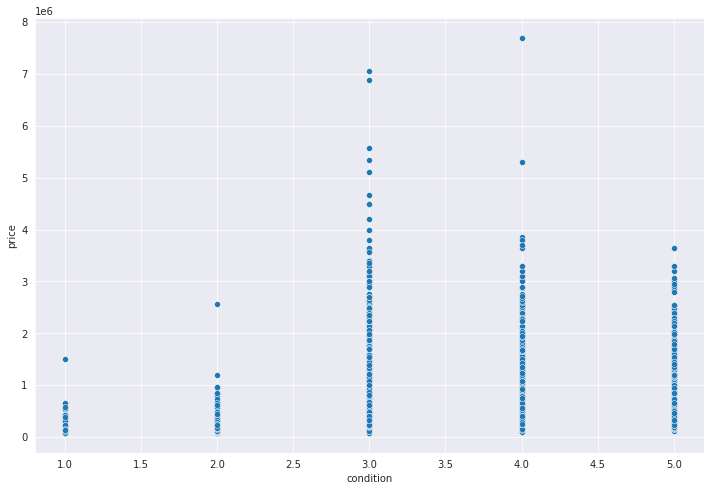

In [289]:
plot_scatter(data_anan, "condition", "price")
plt.savefig("Condition vs price")

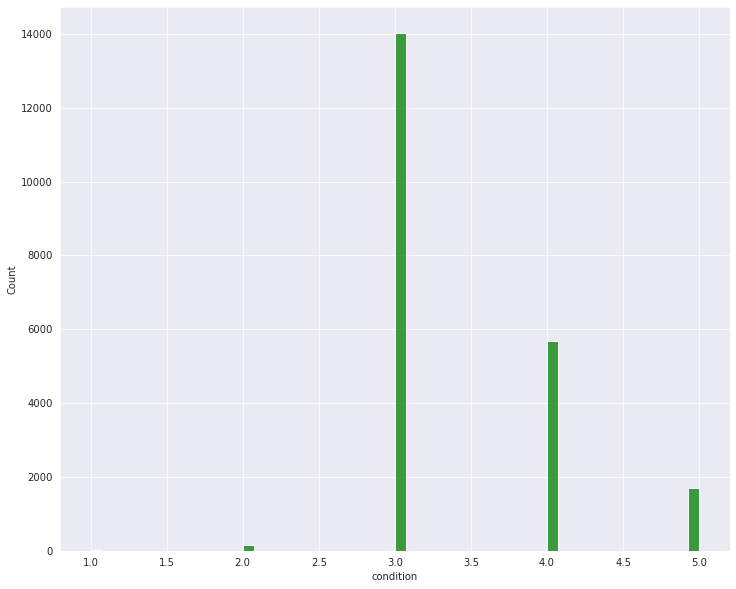

In [263]:
plot_dist(data_anan, "condition")

Most houses in the data set seem to be of average condition at the time of sale. We will OneHotEncode the column below and edit the analysis column as needed;

In [44]:
# OHE the column
condition_ohe = ohe_col(data_anan, "condition")

The categories fitted are [array([1, 2, 3, 4, 5])]
Transformed data is:  [[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [45]:
# Renaming the OHE columns
cond_names = ["condition_1", "condition_2", "condition_3", "condition_4", "condition_5"]
condition_ohe.columns = cond_names
condition_ohe.head()

,condition_1,condition_2,condition_3,condition_4,condition_5
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0


In [46]:
# concatinating the two dataframes and dropping the condition column
data_anan = pd.concat([data_anan, condition_ohe], axis = 1)
data_anan.drop("condition", axis = 1, inplace = True)
data_anan.head()

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,...,average_quality_grade,custom_highest_quality,high_quality_grade,low_quality_grade,poor_quality_grade,condition_1,condition_2,condition_3,condition_4,condition_5
0,7129300520,2014,221900.0,7.073270,8.639411,1.0,1,0.0,7.073270,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6414100192,2014,538000.0,7.851661,8.887653,2.0,0,0.0,7.682482,400,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5631500400,2015,180000.0,6.646391,9.210340,1.0,0,0.0,6.646391,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2487200875,2014,604000.0,7.580700,8.517193,1.0,0,0.0,6.956545,910,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1954400510,2015,510000.0,7.426549,8.997147,1.0,0,0.0,7.426549,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### 14. Floors Total

In [267]:
data_anan["floors"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: floors
Non-Null Count  Dtype  
--------------  -----  
21596 non-null  float64
dtypes: float64(1)
memory usage: 853.5 KB


In [268]:
data_anan["floors"].value_counts()

1.0    10672
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

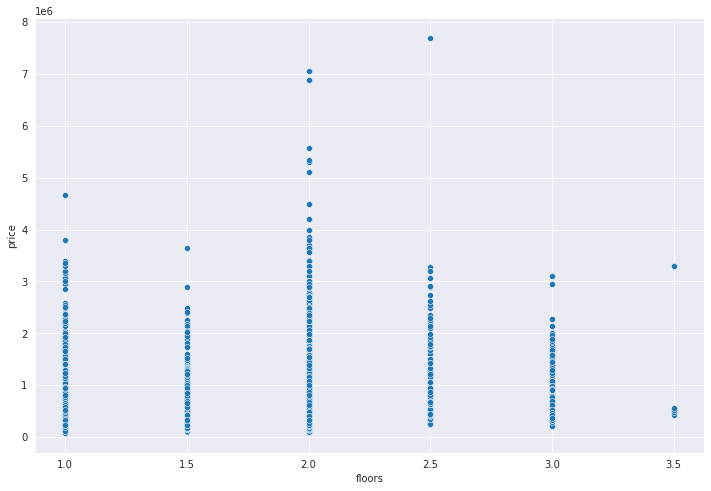

In [269]:
plot_scatter(data_anan, "floors", "price")

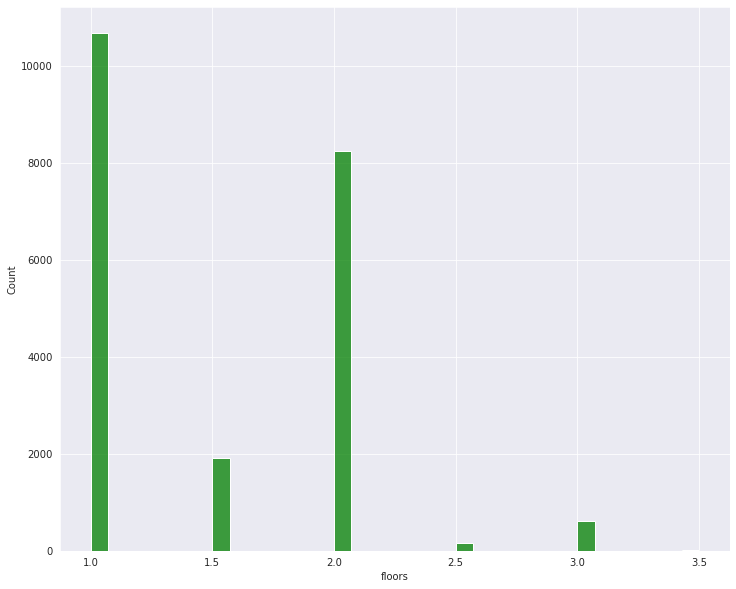

In [155]:
plot_dist(data_anan, "floors")

Most houses either are single floor or double floor homes.

In [47]:
def floor_range(floor):
    """This function will look to break down the floor column into
    a more general scale"""
    if floor <= 1:
        return "one_floor"
    if 1 < floor <= 2:
        return "two_floors"
    else:
        return "three_above_floors"

In [48]:
# Create new column with the broken down ranges
data_anan["floor range"] = data_anan["floors"].apply(floor_range)

# dropping the floors column
data_anan.drop("floors", axis = 1, inplace = True)

In [49]:
# OHE the floor range column
floor_range_ohe = ohe_col(data_anan, "floor range")

The categories fitted are [array(['one_floor', 'three_above_floors', 'two_floors'], dtype=object)]
Transformed data is:  [[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [50]:
# concat the two dataframes and drop the floor range column
data_anan = pd.concat([data_anan, floor_range_ohe], axis = 1)
data_anan.drop("floor range", axis = 1, inplace = True)
data_anan.head()

,id,date,price,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,...,low_quality_grade,poor_quality_grade,condition_1,condition_2,condition_3,condition_4,condition_5,one_floor,three_above_floors,two_floors
0,7129300520,2014,221900.0,7.073270,8.639411,1,0.0,7.073270,0,1955,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,6414100192,2014,538000.0,7.851661,8.887653,0,0.0,7.682482,400,1951,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,5631500400,2015,180000.0,6.646391,9.210340,0,0.0,6.646391,0,1933,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2487200875,2014,604000.0,7.580700,8.517193,0,0.0,6.956545,910,1965,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1954400510,2015,510000.0,7.426549,8.997147,0,0.0,7.426549,0,1987,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### 15. View

In [275]:
data_anan["view"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: view
Non-Null Count  Dtype  
--------------  -----  
21533 non-null  float64
dtypes: float64(1)
memory usage: 853.5 KB


In [51]:
data_anan["view"].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [278]:
data_anan["view"].value_counts()

0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

This is a categorical column. We have 63 values missing from this column. Most entries in this column are zeroes. We will fill in the missing values with the median values. We do this because it won't the distribution of the column too much. We do that below:

In [52]:
# filling NaN values
data_anan["view"] = data_anan["view"].fillna(data_anan["view"].median())

In [53]:
# OHE the column
view_ohe = ohe_col(data_anan, "view")

The categories fitted are [array([0., 1., 2., 3., 4.])]
Transformed data is:  [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [54]:
# Rename the columns
view_ind = ["view_ind0", "view_ind1","view_ind2","view_ind3","view_ind4"]
view_ohe.columns = view_ind
view_ohe.head()

,view_ind0,view_ind1,view_ind2,view_ind3,view_ind4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [55]:
# concat the two dataframes and drop the view column
data_anan = pd.concat([data_anan, view_ohe], axis = 1)
data_anan.drop("view", axis = 1, inplace = True)
data_anan.head()

,id,date,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,condition_4,condition_5,one_floor,three_above_floors,two_floors,view_ind0,view_ind1,view_ind2,view_ind3,view_ind4
0,7129300520,2014,221900.0,7.073270,8.639411,1,7.073270,0,1955,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,6414100192,2014,538000.0,7.851661,8.887653,0,7.682482,400,1951,1991.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,5631500400,2015,180000.0,6.646391,9.210340,0,6.646391,0,1933,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2487200875,2014,604000.0,7.580700,8.517193,0,6.956545,910,1965,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1954400510,2015,510000.0,7.426549,8.997147,0,7.426549,0,1987,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### 16. Price
Given that this is our target variable, we'll only look to the distribution and possible outliers.

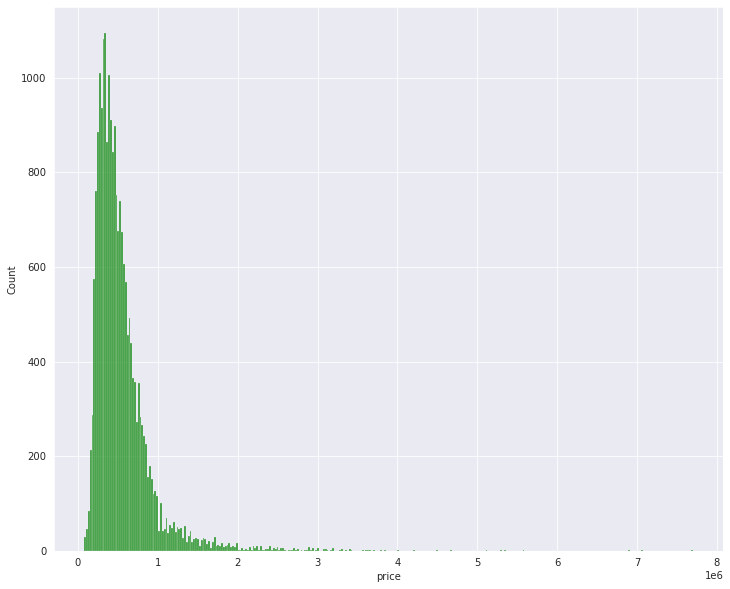

In [67]:
plot_dist(data_anan, "price")

In [68]:
x_vars = data_anan[["price"]]
x_vars["price"] = x_vars["price"].map(lambda x: np.log(x))
x_vars.head()

<ipython-input-68-0b73a50ae352>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_vars["price"] = x_vars["price"].map(lambda x: np.log(x))


,price
0,12.309982
1,13.195614
2,12.100712
3,13.311329
4,13.142166


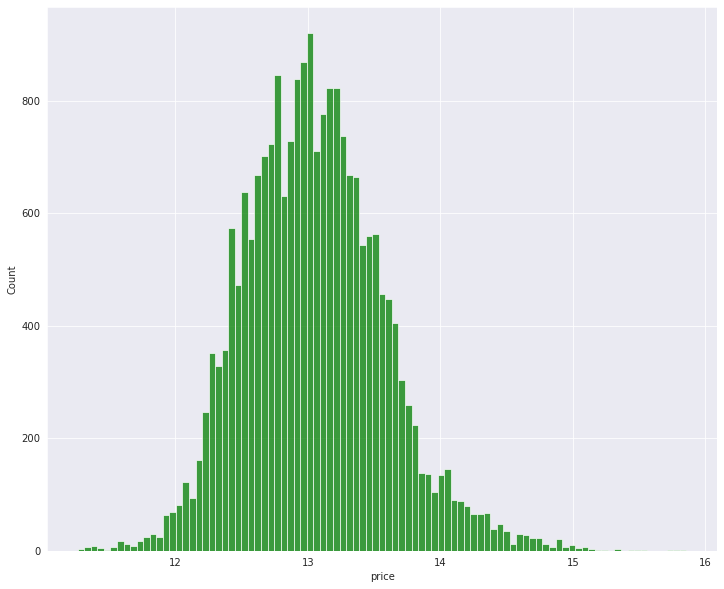

In [69]:
plot_dist(x_vars, "price")

#### 17. House Age

In [142]:
data_anan["house_age"].info()

<class 'pandas.core.series.Series'>
Int64Index: 21596 entries, 0 to 21596
Series name: house_age
Non-Null Count  Dtype
--------------  -----
21596 non-null  int64
dtypes: int64(1)
memory usage: 337.4 KB


In [145]:
data_anan["house_age"].min()

0

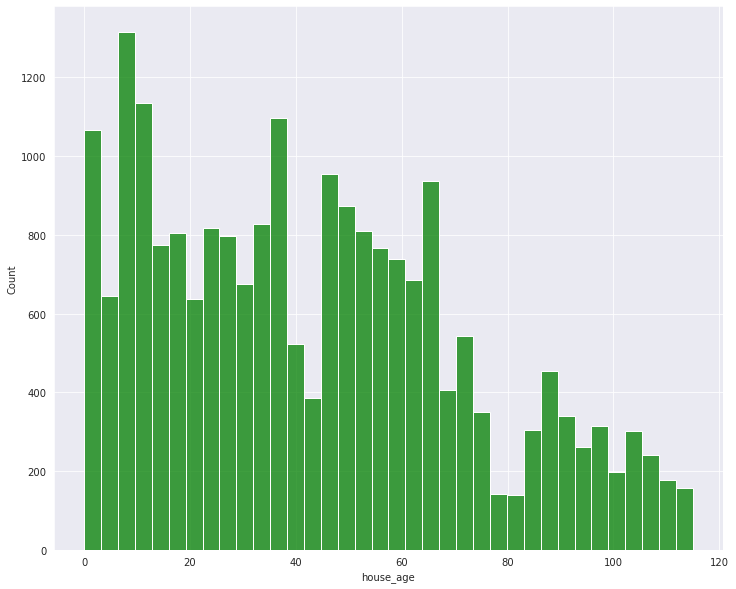

In [301]:
plot_dist(data_anan, "house_age")
plt.savefig("house sales age")

In [56]:
# We scale the variable below and assign it to the column
j = data_anan["house_age"]
scaled_a = (j - min(j)) / (max(j) - min(j))

data_anan["house_age"] = scaled_a

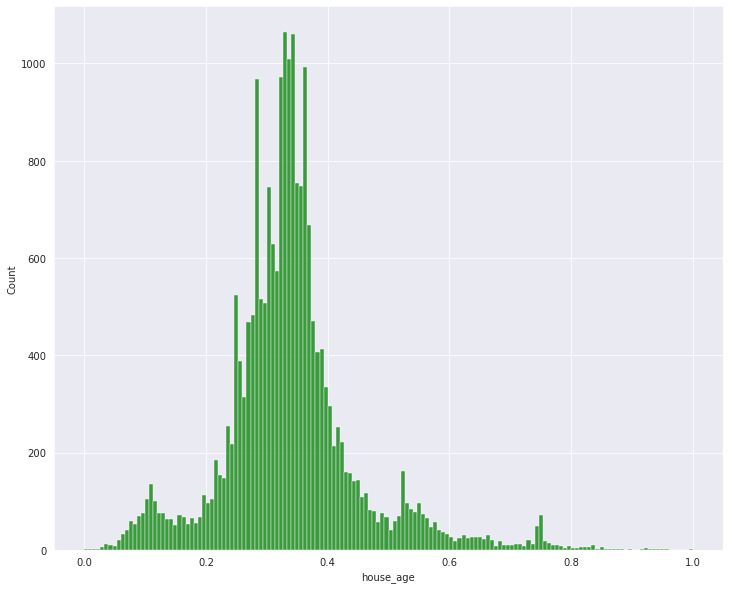

In [57]:
plot_dist(data_anan, "house_age")

#### Conclusion and finalisation of the EDA step
We have seen that some columns may be useful and others may not be useful in the task we are trying to accomplish. From the steps above we have changed the structure of the data frame a little bit and also OneHotEncoded a few columns. Below we will summarise the dataframe, as we prepare it for our model building. 

In [152]:
# We check the data_anan dataframe again
data_anan.head(5).T

,0,1,2,3,4
id,7.129301e+09,6.414100e+09,5.631500e+09,2.487201e+09,1.954401e+09
date,2.014000e+03,2.014000e+03,2.015000e+03,2.014000e+03,2.015000e+03
price,2.219000e+05,5.380000e+05,1.800000e+05,6.040000e+05,5.100000e+05
sqft_living,7.073270e+00,7.851661e+00,6.646391e+00,7.580700e+00,7.426549e+00
sqft_lot,8.639411e+00,8.887653e+00,9.210340e+00,8.517193e+00,8.997147e+00
waterfront,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sqft_above,7.073270e+00,7.682482e+00,6.646391e+00,6.956545e+00,7.426549e+00
sqft_basement,0.000000e+00,4.000000e+02,0.000000e+00,9.100000e+02,0.000000e+00
yr_built,1.955000e+03,1.951000e+03,1.933000e+03,1.965000e+03,1.987000e+03
yr_renovated,0.000000e+00,1.991000e+03,NaN,0.000000e+00,0.000000e+00


There are some obvious columns which will not be useful to our study eg. id, lat, long etc. We know that the yr_built and the date columns were used to create a variable column called house house_age. We choose to drop those columns below here:

In [101]:
cols = ["id", "date", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_above", "sqft_basement"]

# dropping the columns
data_anan.drop(columns = cols, inplace = True)

In [102]:
data_anan.columns

Index(['price', 'sqft_living', 'sqft_lot', 'waterfront', 'sqft_living15',
       'sqft_lot15', 'five_six_bedrooms', 'one_two_bedrooms', 'ov_6_bedrooms',
       'three_four_bedrooms', 'four_five_bathrooms', 'one_bathroom_below',
       'over_5_bathrooms', 'two_three_bathrooms', 'house_age',
       'average_quality_grade', 'custom_highest_quality', 'high_quality_grade',
       'low_quality_grade', 'poor_quality_grade', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'one_floor',
       'three_above_floors', 'two_floors', 'view_ind0', 'view_ind1',
       'view_ind2', 'view_ind3', 'view_ind4'],
      dtype='object')

In [103]:
data_anan.shape

(21596, 33)

## 3. Modeling

In [58]:
# We import the necessary libraries
# Scikit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Statsmodels
from statsmodels.regression import linear_model
import statsmodels.api as sm
import statsmodels.stats.api as sms

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

/home/abbo/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/abbo/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


We are going to separate our data into train and test sets. Here we are also going to separate our target variable from the data set. We start by splitting the dataset below:

In [104]:
# We separate the predictor variables from the target variable
X = data_anan.drop("price", axis = 1)
y = data_anan.price

In [105]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [106]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

X_train is a DataFrame with 17276 rows and 32 columns
y_train is a Series with 17276 values


In [107]:
X_train.head().T

,6243,8986,9419,10155,10436
sqft_living,7.272398,7.265430,8.045588,7.630461,7.824046
sqft_lot,8.487764,9.195937,8.517193,8.847647,8.313852
waterfront,0.000000,0.000000,0.000000,0.000000,0.000000
sqft_living15,1300.000000,1310.000000,3200.000000,1760.000000,1550.000000
sqft_lot15,8.313852,9.198268,8.517193,8.902456,8.026170
five_six_bedrooms,0.000000,0.000000,0.000000,0.000000,0.000000
one_two_bedrooms,0.000000,0.000000,0.000000,0.000000,0.000000
ov_6_bedrooms,0.000000,0.000000,0.000000,0.000000,0.000000
three_four_bedrooms,1.000000,1.000000,1.000000,1.000000,1.000000
four_five_bathrooms,0.000000,0.000000,0.000000,0.000000,0.000000


From EDA, we have observed that some of the columns maybe irrelevant our objective. Below we make a list of the columns which could be dropped

In [108]:
X_train.columns

Index(['sqft_living', 'sqft_lot', 'waterfront', 'sqft_living15', 'sqft_lot15',
       'five_six_bedrooms', 'one_two_bedrooms', 'ov_6_bedrooms',
       'three_four_bedrooms', 'four_five_bathrooms', 'one_bathroom_below',
       'over_5_bathrooms', 'two_three_bathrooms', 'house_age',
       'average_quality_grade', 'custom_highest_quality', 'high_quality_grade',
       'low_quality_grade', 'poor_quality_grade', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'one_floor',
       'three_above_floors', 'two_floors', 'view_ind0', 'view_ind1',
       'view_ind2', 'view_ind3', 'view_ind4'],
      dtype='object')

In [109]:
X_train.shape

(17276, 32)

In [120]:
f = X_train.corr()
sorted_mat = f.unstack().sort_values()
sorted_mat[-40: -32]

sqft_living15  sqft_living      0.740565
sqft_living    sqft_living15    0.740565
house_age      sqft_lot15       0.917623
sqft_lot15     house_age        0.917623
               sqft_lot         0.917623
sqft_lot       sqft_lot15       0.917623
sqft_living    sqft_living      1.000000
view_ind2      view_ind2        1.000000
dtype: float64

Now We check for multicollinearity in the X_train set and look to deal with variables which are collinear.
We will restrict ourselves with columns which are common between our train set and the main data set. We set a list of common columns below.

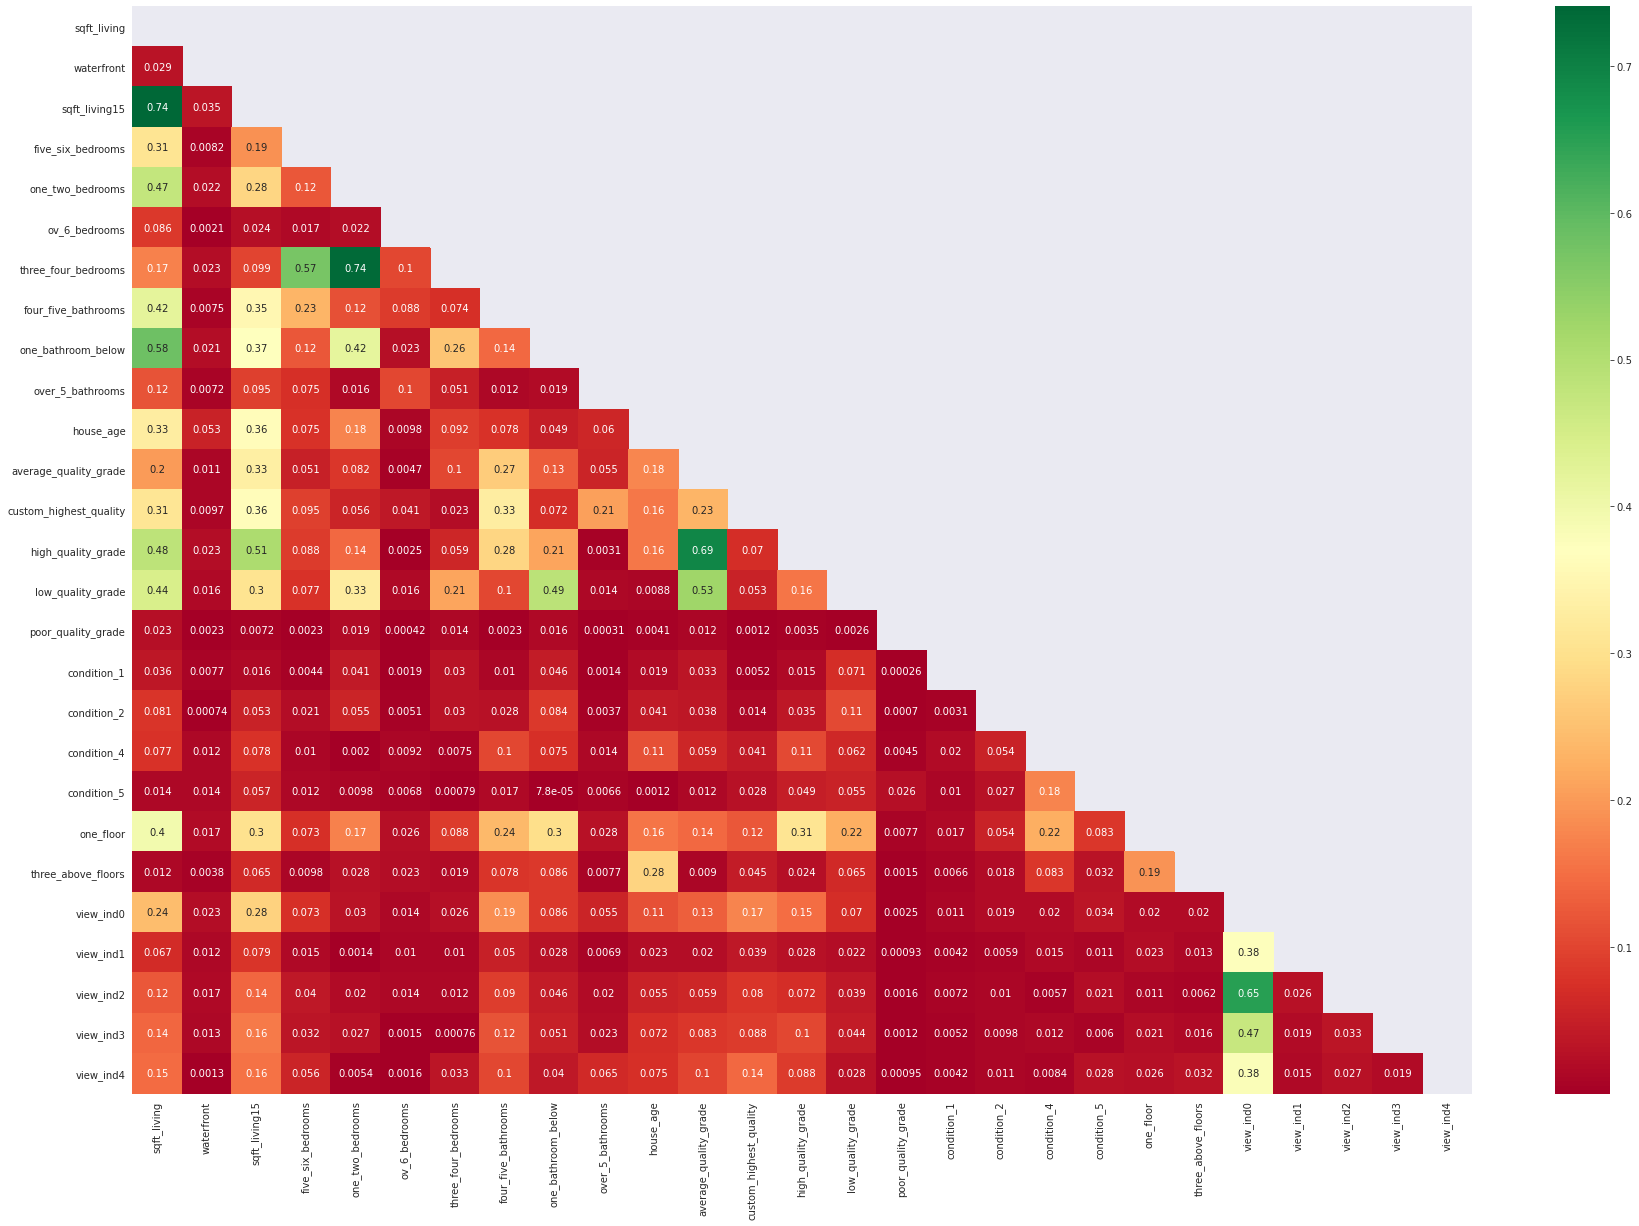

In [127]:
plt.subplots(figsize = (30, 20))
mask = np.triu(np.ones_like(X_train.corr().abs()))
sns.heatmap(X_train.corr().abs(), annot = True, cmap = "RdYlGn", mask = mask);

Let us also check and compare with their correlation with our target variable. We will drop columns which violate the multicollinearity assumption and keep also those with high correlation with the target variable(price).

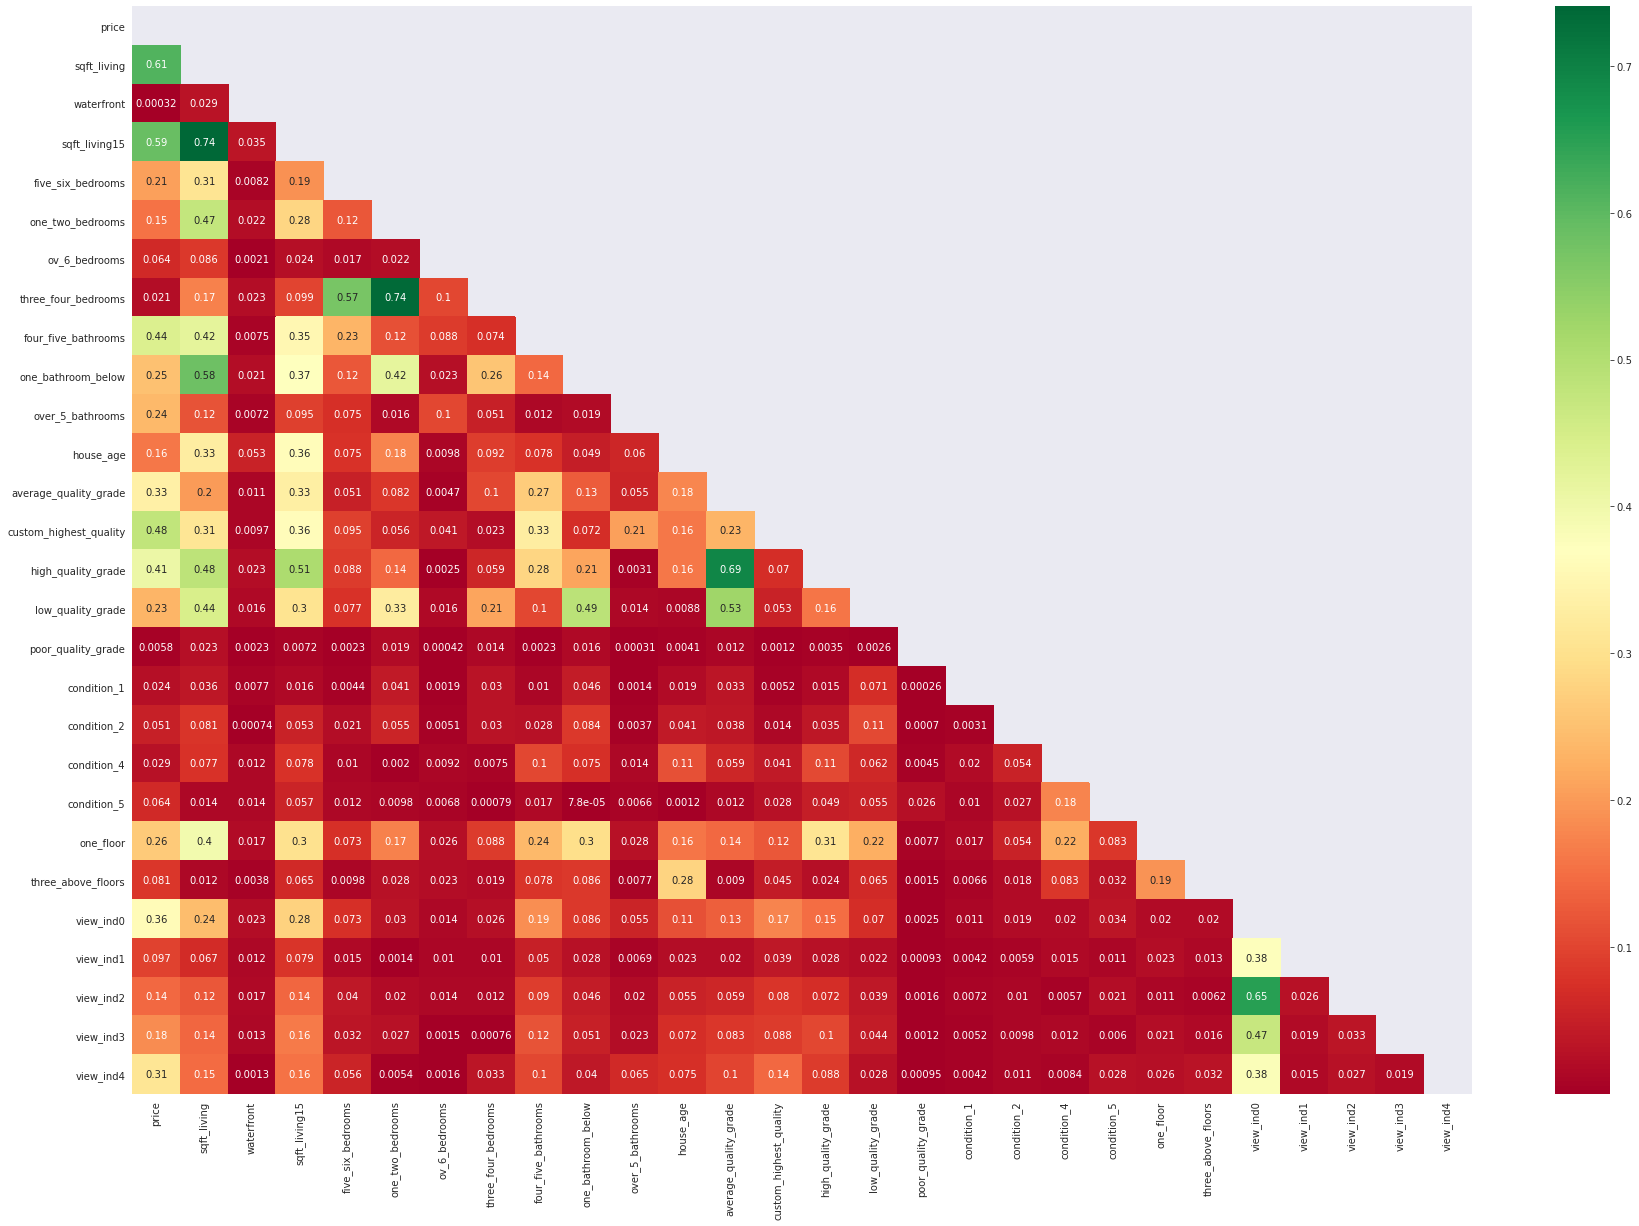

In [128]:
vb = pd.concat([y_train, X_train], axis = 1)
plt.subplots(figsize = (30, 20))
mask = np.triu(np.ones_like(vb.corr().abs()))
sns.heatmap(vb.corr().abs(), annot = True, cmap = "RdYlGn", mask = mask);

Using a threshhold of -.75 and .75. There are highly correlated variables which eg. sqft_above and sqft_living(.86), sqft_lot15 and sqft_lot(.92). Some of the columns are categorical columns we created and hence the reason why we have some strong negatively correlated values.

We drop the sqft_above column and sqft_lot15 to try to remove the multicollinear variables.

In [126]:
X_train.drop(columns = ["sqft_lot", "sqft_lot15", "two_three_bathrooms", "condition_3", "two_floors"], inplace = True)
X_train.columns

<ipython-input-126-5aebbd576b65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns = ["condition_3", "two_floors"], inplace = True)


Index(['sqft_living', 'waterfront', 'sqft_living15', 'five_six_bedrooms',
       'one_two_bedrooms', 'ov_6_bedrooms', 'three_four_bedrooms',
       'four_five_bathrooms', 'one_bathroom_below', 'over_5_bathrooms',
       'house_age', 'average_quality_grade', 'custom_highest_quality',
       'high_quality_grade', 'low_quality_grade', 'poor_quality_grade',
       'condition_1', 'condition_2', 'condition_4', 'condition_5', 'one_floor',
       'three_above_floors', 'view_ind0', 'view_ind1', 'view_ind2',
       'view_ind3', 'view_ind4'],
      dtype='object')

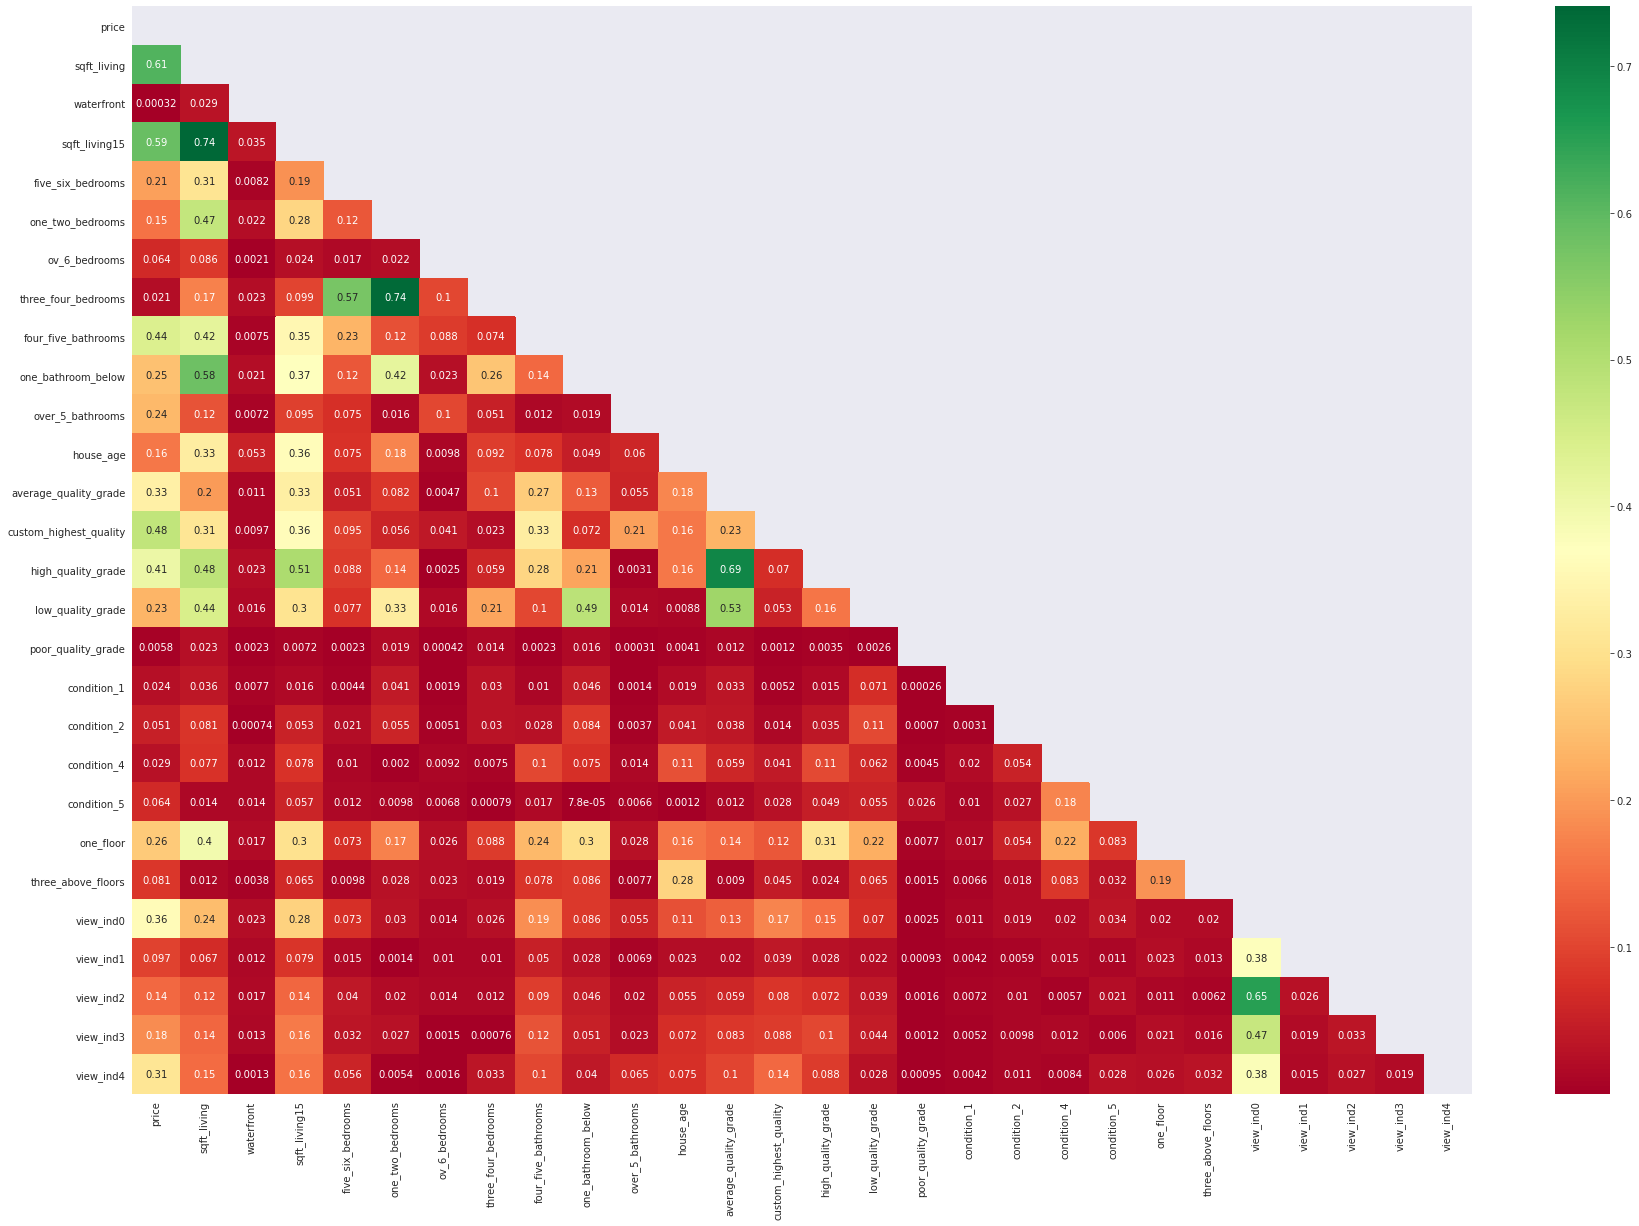

In [129]:
vb2 = pd.concat([y_train, X_train], axis = 1)
plt.subplots(figsize = (30, 20))
mask = np.triu(np.ones_like(vb2.corr().abs()))
sns.heatmap(vb2.corr().abs(), annot = True, cmap = "RdYlGn", mask = mask);

### Building a baseline model
We pick a predictor variable which is most correlated to the target variable(price) from the above heatmap. We pick the sqft_living variable(0.61). We first build a scatter plot to see how it fairs against price. Other variables with a high correlation with the target variable are four_five_bedrooms, custom_highes_quality, high_quality and view_ind4. We should note that most of these are categorical variables.

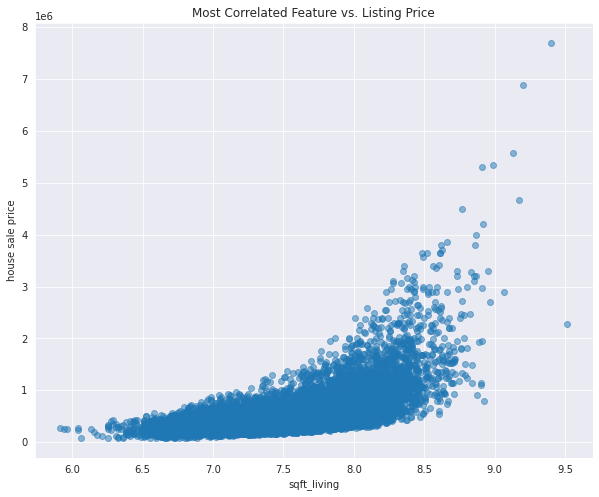

In [355]:
fig, ax = plt.subplots(figsize = (10, 8))

ax.scatter(X_train["sqft_living"], y_train, alpha=0.5)
ax.set_xlabel("sqft_living")
ax.set_ylabel("house sale price")
ax.set_title("Most Correlated Feature vs. Listing Price");

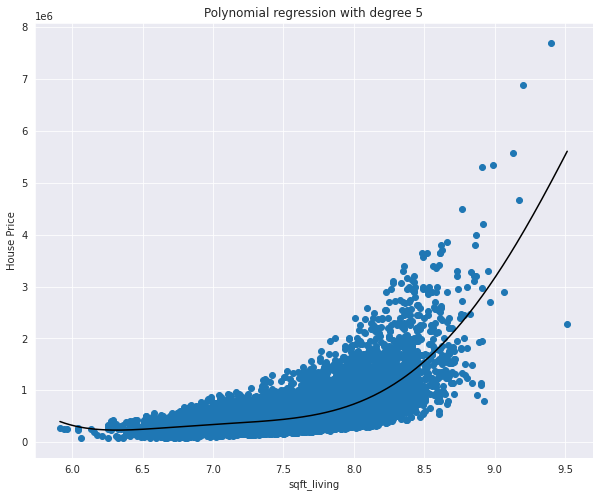

In [381]:
# fitting a polynomial line
from sklearn.pipeline import make_pipeline

a = X_train[["sqft_living"]]
b = y_train.copy()


degree = 5
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(a, b)
X_seq = np.linspace(a.min(), a.max(), 300).reshape(-1, 1)
# Creating the plot again
fig, ax = plt.subplots(figsize = (10, 8))
# plt.figure()
plt.scatter(a, b)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.xlabel("sqft_living")
plt.ylabel("House Price")
plt.savefig("Regression of sqft_living vs Price");

The scatter shows a fairly curve linear relationship. We observe that price of a house seems to increase as the size increases. This could indicate a polynomial relationship. From above we can observe that a polynomial relationship of order 5 seems to exist between the two variables.

In [130]:
b_m = pd.concat([y_train, X_train], axis = 1)
b_m.head()

,price,sqft_living,waterfront,sqft_living15,five_six_bedrooms,one_two_bedrooms,ov_6_bedrooms,three_four_bedrooms,four_five_bathrooms,one_bathroom_below,...,condition_2,condition_4,condition_5,one_floor,three_above_floors,view_ind0,view_ind1,view_ind2,view_ind3,view_ind4
6243,332500.0,7.272398,0,1300,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8986,390000.0,7.265430,0,1310,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9419,800000.0,8.045588,0,3200,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10155,462000.0,7.630461,0,1760,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
10436,695000.0,7.824046,0,1550,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [131]:
b_m.columns

Index(['price', 'sqft_living', 'waterfront', 'sqft_living15',
       'five_six_bedrooms', 'one_two_bedrooms', 'ov_6_bedrooms',
       'three_four_bedrooms', 'four_five_bathrooms', 'one_bathroom_below',
       'over_5_bathrooms', 'house_age', 'average_quality_grade',
       'custom_highest_quality', 'high_quality_grade', 'low_quality_grade',
       'poor_quality_grade', 'condition_1', 'condition_2', 'condition_4',
       'condition_5', 'one_floor', 'three_above_floors', 'view_ind0',
       'view_ind1', 'view_ind2', 'view_ind3', 'view_ind4'],
      dtype='object')

In [139]:
from statsmodels.formula.api import ols
import scipy.stats as stats

f = "price ~ sqft_living"
model = ols(formula = f, data = b_m).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                 1.036e+04
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:33:22   Log-Likelihood:            -2.4189e+05
No. Observations:               17276   AIC:                         4.838e+05
Df Residuals:                   17274   BIC:                         4.838e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -3.48e+06   3.96e+04    -87.957      0.000   -3.56e+06    -3.4e+06
sqft_living  5.324e+05   5230.421    101.797      0.000    5.22e+05    5.43e+05
==============================================================================
Omnibus:                    15192.673   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1164336.952
Skew:                           3.878   Prob(JB):                         0.00
Kurtosis:                      42.463   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our base model shows a R-squared of .375, this is bad as it represents a description of 37.5% of errors in the data. We will attempt to build a second model using the other features which have a high correlation with the target variable.

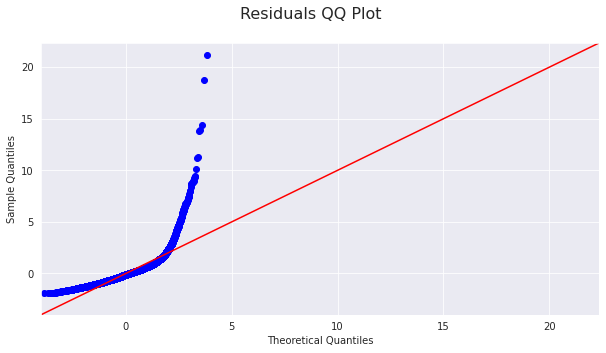

In [141]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5);

Text(0.5, 0.99, 'Residuals Scatterplot')

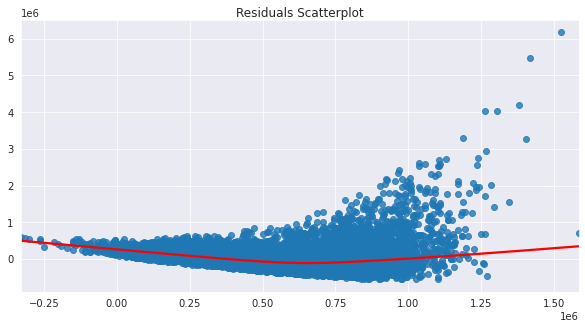

In [142]:
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', y=.99)

There is unequal distribution of points along the intercept line. It appears the normality assumption does not hold for this model. We will attempt to use the other values with a hight correlation with our target variable.

In [143]:
# Our second model
f1 = "price ~ sqft_living + four_five_bathrooms + custom_highest_quality + high_quality_grade"
model2 = ols(formula = f, data = b_m).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                 1.036e+04
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:44:37   Log-Likelihood:            -2.4189e+05
No. Observations:               17276   AIC:                         4.838e+05
Df Residuals:                   17274   BIC:                         4.838e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -3.48e+06   3.96e+04    -87.957      0.000   -3.56e+06    -3.4e+06
sqft_living  5.324e+05   5230.421    101.797      0.000    5.22e+05    5.43e+05
==============================================================================
Omnibus:                    15192.673   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1164336.952
Skew:                           3.878   Prob(JB):                         0.00
Kurtosis:                      42.463   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

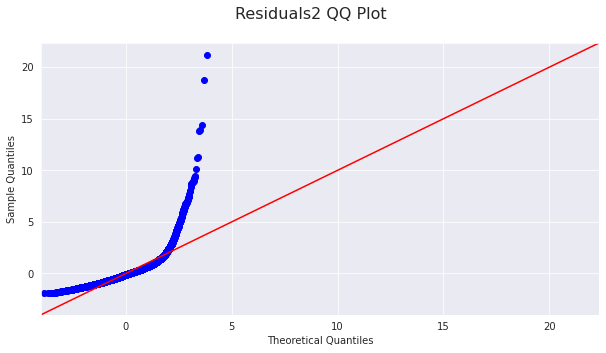

In [145]:
residuals2 = model2.resid
fig = sm.graphics.qqplot(residuals2, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals2 QQ Plot', fontsize=16)
fig.set_size_inches(10, 5);

Text(0.5, 0.99, 'Residuals2 Scatterplot')

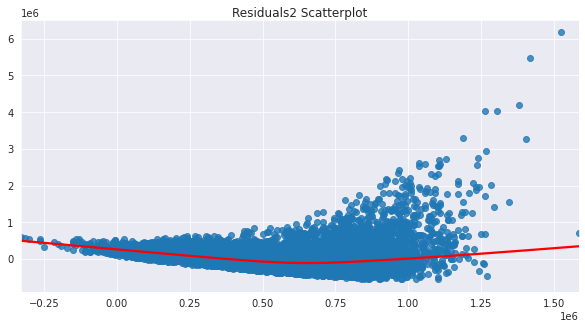

In [146]:
plt.figure(figsize=(10,5))
sns.regplot(x=model2.predict(), y=model2.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals2 Scatterplot', y=.99)

From above, nothing has changed from the R squared above. For our  third model we try and fit everything in the X_train dataset.

In [150]:
# Fitting everything from the X_train data set
cols = '+'.join(X_train.columns)
f3 = y_train.name + '~' + cols

model3 = ols(formula = f3, data = b_m).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1151.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:49:21   Log-Likelihood:            -2.3769e+05
No. Observations:               17276   AIC:                         4.754e+05
Df Residuals:                   17251   BIC:                         4.756e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -8.143e+05   4.72e+04    -17.266      0.000   -9.07e+05   -7.22e+05
sqft_living             2.739e+05   8630.611     31.741      0.000    2.57e+05    2.91e+05
waterfront              1.498e+04   6218.834      2.409      0.016    2789.321    2.72e+04
sqft_living15             75.6034      4.243     17.818      0.000      67.287      83.920
five_six_bedrooms      -2.123e+05    1.5e+04    -14.195      0.000   -2.42e+05   -1.83e+05
one_two_bedrooms       -1.539e+05   1.27e+04    -12.081      0.000   -1.79e+05   -1.29e+05
ov_6_bedrooms          -2.221e+05   2.86e+04     -7.766      0.000   -2.78e+05   -1.66e+05
three_four_bedrooms    -2.261e+05   1.32e+04    -17.098      0.000   -2.52e+05      -2e+05
four_five_bathrooms     1.452e+05   7455.198     19.471      0.000    1.31e+05     1.6e+05
one_bathroom_below      5.958e+04   6114.399      9.745      0.000    4.76e+04    7.16e+04
over_5_bathrooms        1.172e+06    4.5e+04     26.039      0.000    1.08e+06    1.26e+06
house_age                -2.9e+05   1.89e+04    -15.382      0.000   -3.27e+05   -2.53e+05
average_quality_grade  -3.188e+05   4.12e+04     -7.732      0.000      -4e+05   -2.38e+05
custom_highest_quality  3.391e+05   4.32e+04      7.850      0.000    2.54e+05    4.24e+05
high_quality_grade     -1.363e+05   4.17e+04     -3.268      0.001   -2.18e+05   -5.46e+04
low_quality_grade      -3.711e+05   4.13e+04     -8.995      0.000   -4.52e+05    -2.9e+05
poor_quality_grade     -3.271e+05   1.89e+05     -1.733      0.083   -6.97e+05    4.28e+04
condition_1            -7969.4768   5.14e+04     -0.155      0.877   -1.09e+05    9.27e+04
condition_2             2.548e+04   1.95e+04      1.310      0.190   -1.26e+04    6.36e+04
condition_4             6.379e+04   4208.495     15.157      0.000    5.55e+04     7.2e+04
condition_5             1.449e+05   6642.185     21.812      0.000    1.32e+05    1.58e+05
one_floor               4965.2165   4216.643      1.178      0.239   -3299.832    1.32e+04
three_above_floors      9.718e+04   9979.807      9.738      0.000    7.76e+04    1.17e+05
view_ind0              -3.509e+05   1.02e+04    -34.479      0.000   -3.71e+05   -3.31e+05
view_ind1              -2.004e+05   1.55e+04    -12.896      0.000   -2.31e+05    -1.7e+05
view_ind2              -2.589e+05   1.23e+04    -21.015      0.000   -2.83e+05   -2.35e+05
view_ind3              -1.797e+05    1.4e+04    -12.861      0.000   -2.07e+05   -1.52e+05
view_ind4               1.756e+05   1.57e+04     11.208      0.000    1.45e+05    2.06e+05
==============================================================================
Omnibus:                    10894.428   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           529979.843
Skew:                    

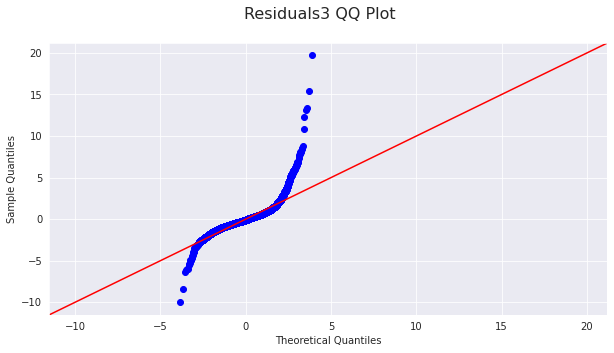

In [151]:
residual3 = model3.resid
fig = sm.graphics.qqplot(residual3, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals3 QQ Plot', fontsize=16)
fig.set_size_inches(10, 5);

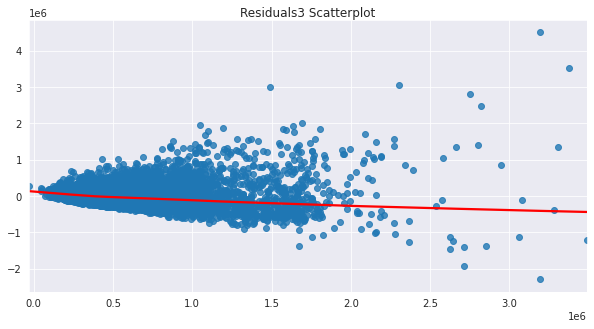

In [152]:
plt.figure(figsize=(10,5))
sns.regplot(x=model3.predict(), y=model3.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals3 Scatterplot', y=.99);

The R-squared of our model increased to .647 this is good, it is an improvement from our earlier models. However there are some values with significant pvalues, which may indicate they are not significant. We will look to drop the variables however I doubt the model would improve any further.

From the above summary, we can see that there are variables which are not statistically significant at alpha = .05. These columns will be dropped before we run a third model. These columns will be dropped below:

In [241]:
X_train.columns

Index(['sqft_living', 'sqft_lot', 'waterfront', 'sqft_living15',
       'five_six_bedrooms', 'one_two_bedrooms', 'ov_6_bedrooms',
       'three_four_bedrooms', 'four_five_bathrooms', 'one_bathroom_below',
       'over_5_bathrooms', 'two_three_bathrooms', 'house_age',
       'average_quality_grade', 'custom_highest_quality', 'high_quality_grade',
       'low_quality_grade', 'poor_quality_grade', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'one_floor',
       'three_above_floors', 'two_floors', 'view_ind0', 'view_ind1',
       'view_ind2', 'view_ind3', 'view_ind4'],
      dtype='object')

In [79]:
not_stat_sig = [
    "waterfront", "one_two_bedrooms", "high_quality_grade",
    "poor_quality_grade", "condition_5", "three_above_floors"
]

In [80]:
X_train.drop(columns = not_stat_sig, inplace = True)

<ipython-input-80-9e30d65c8488>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(not_stat_sig, axis = 1, inplace = True)


The model performed well so far but the performance between the second model and third model are generally the same, which is about .647 for the Train set and about .639 for the Validation set.

In [81]:
cols = '+'.join(X_train.columns)
f4 = y_train.name + '~' + cols

all_feats_2 = ols(formula = f4, data = b_m).fit()
all_feats_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1255.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:14:53   Log-Likelihood:            -2.3770e+05
No. Observations:               17276   AIC:                         4.754e+05
Df Residuals:                   17253   BIC:                         4.756e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2.246e+05   3.11e+04     -7.217      0.000   -2.86e+05   -1.64e+05
sqft_living             2.743e+05   8626.533     31.800      0.000    2.57e+05    2.91e+05
sqft_lot               -5.699e+04   3670.211    -15.528      0.000   -6.42e+04   -4.98e+04
sqft_living15             75.4845      4.243     17.789      0.000      67.167      83.802
five_six_bedrooms       -5.83e+04   9062.618     -6.433      0.000   -7.61e+04   -4.05e+04
ov_6_bedrooms          -6.843e+04   3.27e+04     -2.095      0.036   -1.32e+05   -4413.671
three_four_bedrooms    -7.222e+04   6032.040    -11.973      0.000    -8.4e+04   -6.04e+04
four_five_bathrooms     -2.55e+05   1.36e+04    -18.766      0.000   -2.82e+05   -2.28e+05
one_bathroom_below     -3.404e+05   1.22e+04    -27.972      0.000   -3.64e+05   -3.17e+05
over_5_bathrooms         7.71e+05   3.64e+04     21.167      0.000       7e+05    8.42e+05
two_three_bathrooms    -4.001e+05   1.25e+04    -32.071      0.000   -4.25e+05   -3.76e+05
house_age               1.671e+05   2.38e+04      7.027      0.000     1.2e+05    2.14e+05
average_quality_grade  -1.823e+05   6066.558    -30.048      0.000   -1.94e+05    -1.7e+05
custom_highest_quality  4.755e+05   1.33e+04     35.824      0.000    4.49e+05    5.02e+05
low_quality_grade      -2.344e+05   9422.205    -24.873      0.000   -2.53e+05   -2.16e+05
condition_1            -1.518e+05   5.17e+04     -2.938      0.003   -2.53e+05   -5.05e+04
condition_2            -1.194e+05   2.02e+04     -5.897      0.000   -1.59e+05   -7.97e+04
condition_3            -1.449e+05   6639.832    -21.825      0.000   -1.58e+05   -1.32e+05
condition_4              -8.1e+04   7066.256    -11.463      0.000   -9.48e+04   -6.71e+04
one_floor              -9.191e+04   1.04e+04     -8.845      0.000   -1.12e+05   -7.15e+04
two_floors             -9.701e+04   9980.806     -9.719      0.000   -1.17e+05   -7.74e+04
view_ind0              -2.333e+05   7628.139    -30.586      0.000   -2.48e+05   -2.18e+05
view_ind1              -8.231e+04   1.38e+04     -5.966      0.000   -1.09e+05   -5.53e+04
view_ind2              -1.408e+05   1.01e+04    -13.899      0.000   -1.61e+05   -1.21e+05
view_ind3              -6.151e+04    1.2e+04     -5.125      0.000    -8.5e+04    -3.8e+04
view_ind4               2.934e+05   1.38e+04     21.221      0.000    2.66e+05     3.2e+05
==============================================================================
Omnibus:                    10882.251   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           528148.420
Skew:                           2.385   Prob(JB):                         0.00
Kurtosis:                      29.664   Cond. No.                     5.32e+16
=================================================

It looks like the model is at its best. We will now test it against the Test set and see how it performs.

## 4. Model validation

First we remove columns which were dropped from the X_train dataset from the X_test data set

In [155]:
X_test.drop(columns = ["sqft_lot", "sqft_lot15", "two_three_bathrooms", "condition_3", "two_floors"], inplace = True)
X_test.shape

<ipython-input-155-e2adf0284cab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns = ["sqft_lot", "sqft_lot15", "two_three_bathrooms", "condition_3", "two_floors"], inplace = True)


(4320, 27)

In [156]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 52256120055.29477
Test Mean Squared Error: 53665266166.84825


With a significant MSE, we can say that the model is not a good one. Maybe fitting a polynomial model would be more appropriate. Lets try that below:

In [164]:
# We define a polynomial method from sklearn of order 3
poly = PolynomialFeatures(degree = 2)
X_polynom = poly.fit_transform(X_train[["sqft_living"]])
X_polynom

# Fitting the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_polynom, y_train)

polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())

LinearRegression()

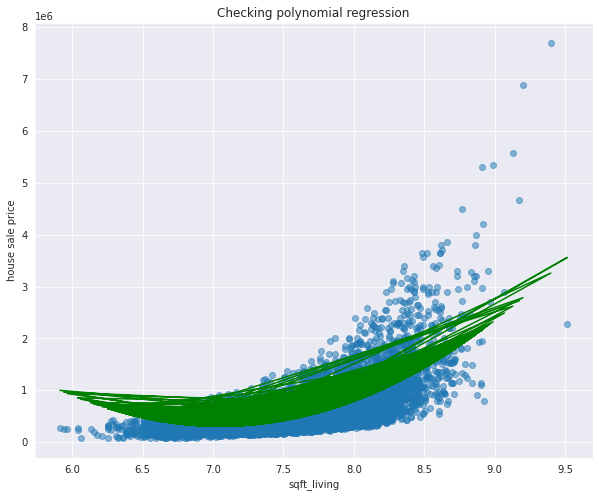

In [165]:
# Visualizing the plot to see what happens
pred = poly_reg.predict(poly.fit_transform(X_train[["sqft_living"]]))
fig, ax = plt.subplots(figsize = (10, 8))

ax.scatter(X_train["sqft_living"], y_train, alpha=0.5)
ax.plot(X_train["sqft_living"], pred, color = "green")
ax.set_xlabel("sqft_living")
ax.set_ylabel("house sale price")
ax.set_title("Checking polynomial regression");

## Conclusion

With a significant error in our model prediction, we can not say we are confident we can deploy these model in production. I would recommend a review of the regression process or probably review the feature selection process.

## Round about way (Lasso Regression)
With the results above proving incoclusive, am going to use an orthodox method which I obtained from an internet search. We are going to use Lasso regression to obtain variables for feature selection and obtain the model scores below. This method was implemented under the tutorial from the link below:
https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/#lasso-regression-in-python

We first re-run the train and test split cell to obtain the original values.

In [ ]:
# We separate the predictor variables from the target variable
X = data_anan.drop("price", axis = 1)
y = data_anan.price

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [166]:
X_train.head(2)

,sqft_living,waterfront,sqft_living15,five_six_bedrooms,one_two_bedrooms,ov_6_bedrooms,three_four_bedrooms,four_five_bathrooms,one_bathroom_below,over_5_bathrooms,...,condition_2,condition_4,condition_5,one_floor,three_above_floors,view_ind0,view_ind1,view_ind2,view_ind3,view_ind4
6243,7.272398,0,1300,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8986,7.265430,0,1310,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [167]:
X_train.columns

Index(['sqft_living', 'waterfront', 'sqft_living15', 'five_six_bedrooms',
       'one_two_bedrooms', 'ov_6_bedrooms', 'three_four_bedrooms',
       'four_five_bathrooms', 'one_bathroom_below', 'over_5_bathrooms',
       'house_age', 'average_quality_grade', 'custom_highest_quality',
       'high_quality_grade', 'low_quality_grade', 'poor_quality_grade',
       'condition_1', 'condition_2', 'condition_4', 'condition_5', 'one_floor',
       'three_above_floors', 'view_ind0', 'view_ind1', 'view_ind2',
       'view_ind3', 'view_ind4'],
      dtype='object')

#### Standardizing numerical columns

In [168]:
# import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

numeric_cols = ["sqft_living", "sqft_living15"]

scaler = StandardScaler().fit(X_train[numeric_cols]) 

X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])

X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

<ipython-input-168-ebb779f48d13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
<ipython-input-168-ebb779f48d13>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [169]:
X_train

,sqft_living,waterfront,sqft_living15,five_six_bedrooms,one_two_bedrooms,ov_6_bedrooms,three_four_bedrooms,four_five_bathrooms,one_bathroom_below,over_5_bathrooms,...,condition_2,condition_4,condition_5,one_floor,three_above_floors,view_ind0,view_ind1,view_ind2,view_ind3,view_ind4
6243,-0.658846,0,-1.003156,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8986,-0.675281,0,-0.988540,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9419,1.164585,0,1.773872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10155,0.185581,0,-0.330823,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
10436,0.642116,0,-0.637757,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0.372586,0,0.356126,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21576,-1.108554,0,-1.178547,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5390,-0.515874,0,-0.681605,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
860,-3.800667,0,-1.193163,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Lasso Regression

In [170]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha = 1)
reg.fit(X_train, y_train)

/home/abbo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2358259611382.25, tolerance: 234852426126.58835
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [171]:
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 61.56
R squared test set 59.04


In [172]:
# Checking MSEs
# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 52256139912.6
MSE test set 53663538481.98


#### Lasso with optimal alpha
#### k-fold cross validation

In [173]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

Show best alpha ie. showing the best value of penalization chosen by cross validation:

In [175]:
model.alpha_

225.77100281630013

Finding the best model

In [176]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=225.77100281630013)

In [181]:
print(list(zip(lasso_best.coef_, X)))

[(115945.80931477417, 'sqft_living'), (12545.092542462195, 'sqft_lot'), (51687.56909943093, 'waterfront'), (0.0, 'sqft_living15'), (55629.24827197146, 'sqft_lot15'), (-0.0, 'five_six_bedrooms'), (-15799.593453615063, 'one_two_bedrooms'), (141678.80167770002, 'ov_6_bedrooms'), (56700.013842632754, 'three_four_bedrooms'), (1029036.7756971495, 'four_five_bathrooms'), (-261915.8921985035, 'one_bathroom_below'), (-117480.47357278458, 'over_5_bathrooms'), (535617.1348683423, 'two_three_bathrooms'), (61185.57093468894, 'house_age'), (-164758.10856546738, 'average_quality_grade'), (-0.0, 'custom_highest_quality'), (-0.0, 'high_quality_grade'), (0.0, 'low_quality_grade'), (60871.22502908802, 'poor_quality_grade'), (140237.29272080344, 'condition_1'), (1895.7740967030672, 'condition_2'), (94119.67043393666, 'condition_3'), (-152127.02855298377, 'condition_4'), (-0.0, 'condition_5'), (-54011.262696223486, 'one_floor'), (10789.5569907682, 'three_above_floors'), (363273.01157300675, 'two_floors')]


#### Model Evaluation

In [178]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 61.52
R squared test set 59.27


In [179]:
mean_squared_error(y_test, lasso_best.predict(X_test))

53357332010.89242